In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from PIL import Image
from scipy import stats
from skimage.metrics import structural_similarity as ssim
from google.colab.patches import cv2_imshow


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imagens

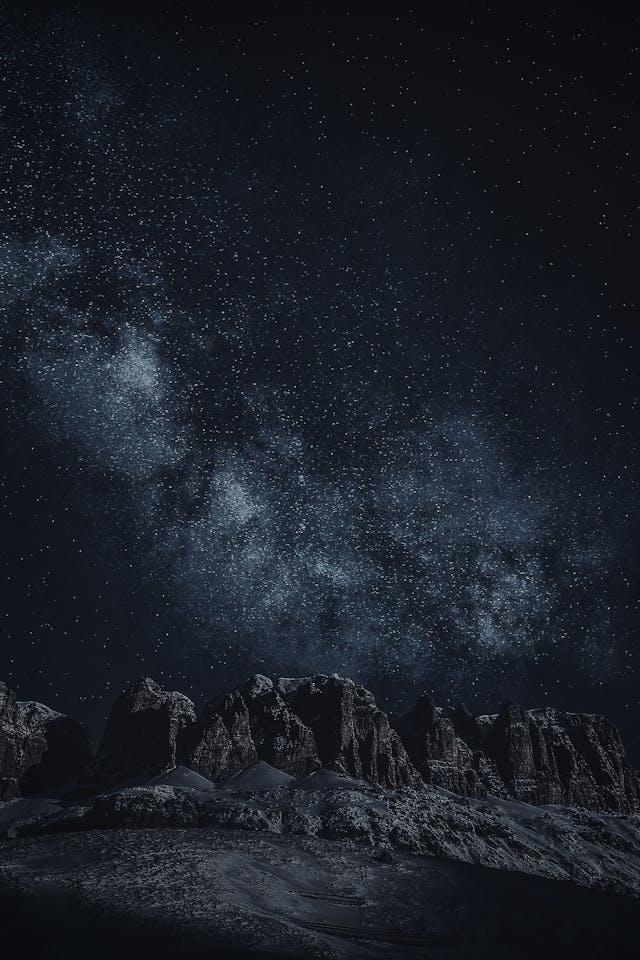

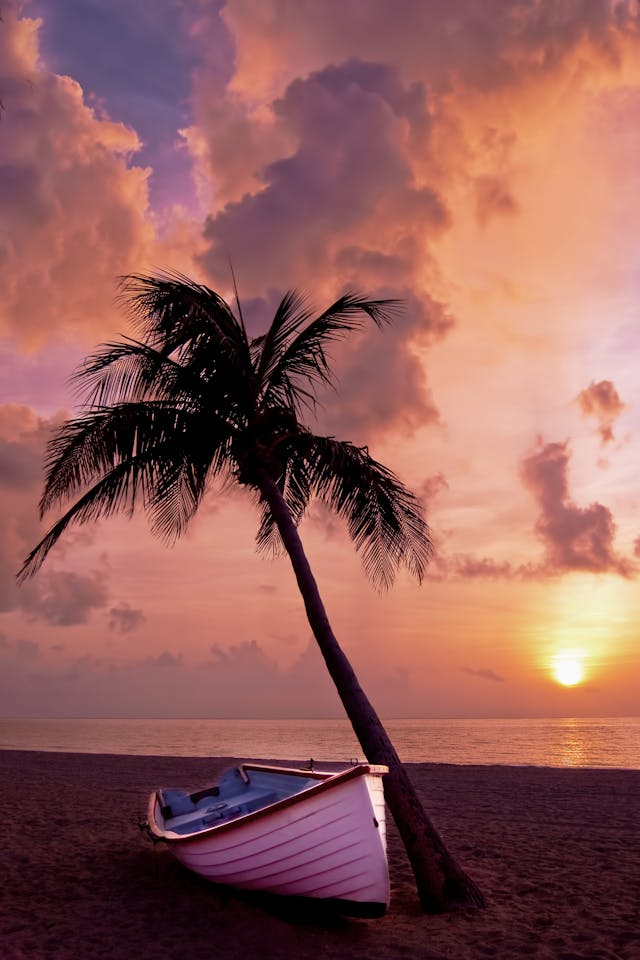

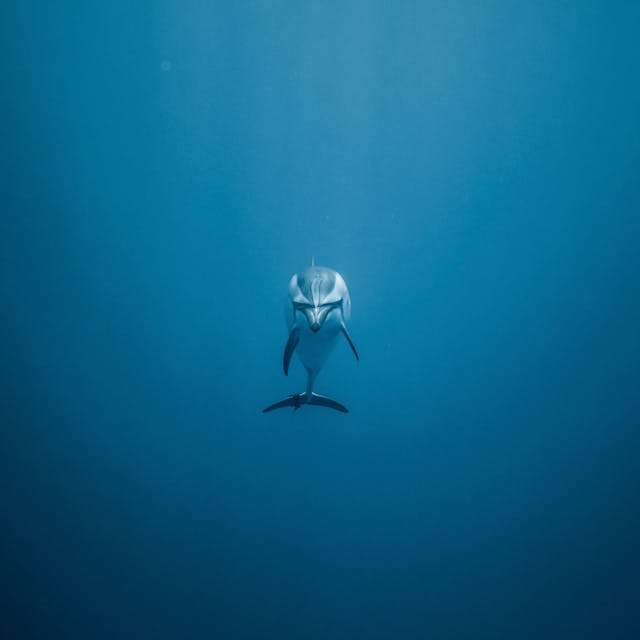

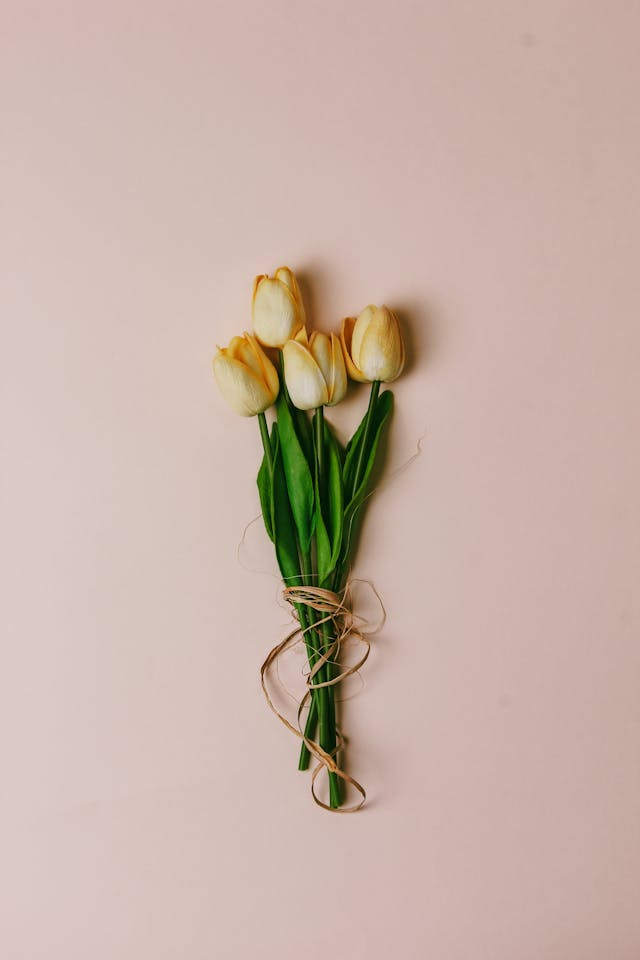

In [ ]:
# Lista de caminhos para as quatro imagens
imagens = ['/content/drive/MyDrive/PIM/ATVD02/small1.jpg',  '/content/drive/MyDrive/PIM/ATVD02/small2.jpg',  '/content/drive/MyDrive/PIM/ATVD02/small3.jpg', '/content/drive/MyDrive/PIM/ATVD02/small4.jpg']

for path in imagens:
    imagem = cv2.imread(path)
    if imagem is not None:
        cv2_imshow(imagem)
    else:
        print(f'Erro ao carregar a imagem {path}.')

In [ ]:
img1a =  "/content/drive/MyDrive/PIM/ATVD02/small1.jpg"


img2a = "/content/drive/MyDrive/PIM/ATVD02/small2.jpg"


img3a = "/content/drive/MyDrive/PIM/ATVD02/small3.jpg"


img4a = "/content/drive/MyDrive/PIM/ATVD02/small4.jpg"



def Inf_spatial(img_grayscale):
    sh = cv2.Sobel (img_grayscale, cv2.CV_64F , 1, 0, ksize =1)
    sv = cv2.Sobel (img_grayscale , cv2.CV_64F , 0, 1, ksize =1)

    #SIr = np.sqrt (sh **2 + sv **2)
    SIr = np.sqrt(np.square(sh) + np.square(sv))

    SI_mean = np.sum(SIr ) / (SIr. shape [0] * SIr . shape [1])
    SI_rms = np.sqrt (np.sum (SIr **2) / (SIr. shape [0] * SIr . shape [1]) )
    SI_stdev = np.sqrt (np.sum(SIr **2 - SI_mean **2) / (SIr. shape [0] *SIr. shape [1]) )

    return SI_stdev

imag_1a = cv2.imread(img1a)

imag_2a = cv2.imread(img2a)

imag_3a = cv2.imread(img3a)

imag_4a = cv2.imread(img4a)



imgGrey1 = cv2.cvtColor(imag_1a,cv2.COLOR_BGR2GRAY)
imgGrey2 = cv2.cvtColor(imag_2a,cv2.COLOR_BGR2GRAY)
imgGrey3 = cv2.cvtColor(imag_3a,cv2.COLOR_BGR2GRAY)
imgGrey4 = cv2.cvtColor(imag_4a,cv2.COLOR_BGR2GRAY)


SI = Inf_spatial(imgGrey1)
SI2 = Inf_spatial(imgGrey2)
SI3 = Inf_spatial(imgGrey3)
SI4 = Inf_spatial(imgGrey4)


print ("Informação espacial 1 : %f" % SI )
print ("Informação espacial 2 : %f" % SI2 )
print ("Informação espacial 3 : %f" % SI3 )
print ("Informação espacial 4 : %f" % SI4 )

Informação espacial 1 : 23.851242
Informação espacial 2 : 21.818437
Informação espacial 3 : 3.758798
Informação espacial 4 : 11.215503


### 1) Equação que faz RGB ➟ Tons de cinza

Fórmula Média:  Tons de cinza = (R + G + B / 3)

Fórmula Ponderada: Tons de cinza = ((0,3 * R) + (0,59 * G) + (0,11 * B))


In [ ]:
def rgb2gray(img,parameter):
    nova_img = np.ones((img.shape[0],img.shape[1]),dtype = np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            B = img[i,j,0]
            G = img[i,j,1]
            R = img[i,j,2]
            if parameter == 0:
                I = (R+G+B)/3
                I = int(I)
            if parameter == 1:
                I = (0.3*R) + (0.59*G) + (0.11*B)
                I = int(I)
            img[i,j,0] = I
            img[i,j,1] = I
            img[i,j,2] = I
    return img;

#### Imagem 1

<ipython-input-4-14cd60351feb>:9: RuntimeWarning: overflow encountered in scalar add
  I = (R+G+B)/3


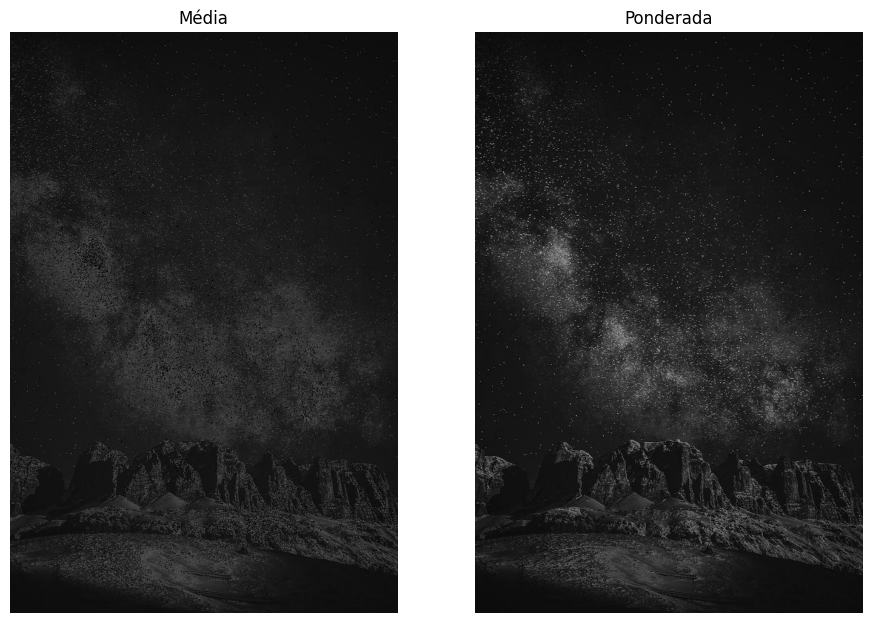

In [ ]:
# Método média
img_1m= cv2.imread(img1a)
greyMedia1 = rgb2gray(img_1m, 0)

# Método ponderado
img_1p= cv2.imread(img1a)
greyPond1 = rgb2gray(img_1p, 1)


# Plotar as imagens
plt.figure(figsize=(17, 10))
plt.subplot(131), plt.imshow(greyMedia1), plt.title('Média'), plt.axis('off')
plt.subplot(132), plt.imshow(greyPond1), plt.title('Ponderada'), plt.axis('off')
plt.show()



#### Imagem 2

<ipython-input-4-14cd60351feb>:9: RuntimeWarning: overflow encountered in scalar add
  I = (R+G+B)/3


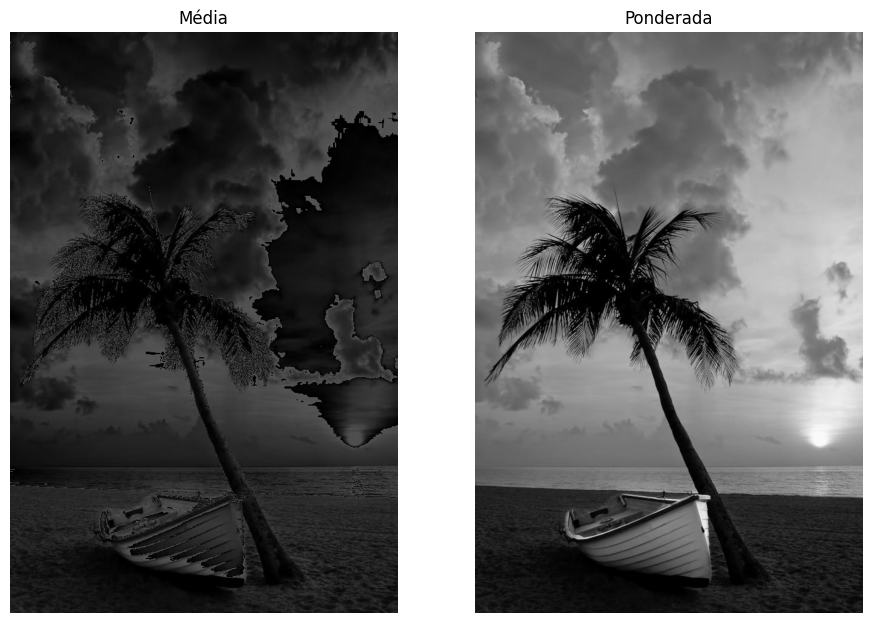

In [ ]:
# Método média
img_2m= cv2.imread(img2a)
greyMedia2 = rgb2gray(img_2m, 0)

# Método ponderado
img_2p= cv2.imread(img2a)
greyPond2 = rgb2gray(img_2p, 1)


# Plotar as imagens
plt.figure(figsize=(17, 10))
plt.subplot(131), plt.imshow(greyMedia2), plt.title('Média'), plt.axis('off')
plt.subplot(132), plt.imshow(greyPond2), plt.title('Ponderada'), plt.axis('off')
plt.show()


#### Imagem 3

<ipython-input-4-14cd60351feb>:9: RuntimeWarning: overflow encountered in scalar add
  I = (R+G+B)/3


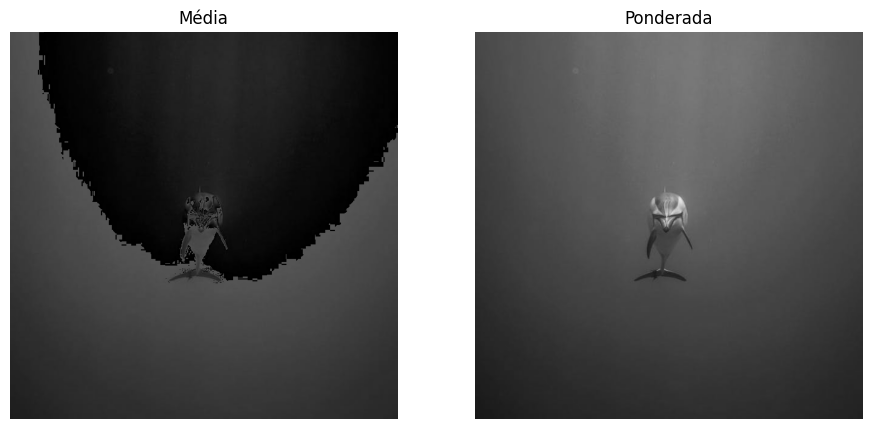

In [ ]:
# Método média
img_3m= cv2.imread(img3a)
greyMedia3 = rgb2gray(img_3m, 0)

# Método ponderado
img_3p= cv2.imread(img3a)
greyPond3 = rgb2gray(img_3p, 1)


# Plotar as imagens
plt.figure(figsize=(17, 10))
plt.subplot(131), plt.imshow(greyMedia3), plt.title('Média'), plt.axis('off')
plt.subplot(132), plt.imshow(greyPond3), plt.title('Ponderada'), plt.axis('off')
plt.show()


#### Imagem 4

<ipython-input-4-14cd60351feb>:9: RuntimeWarning: overflow encountered in scalar add
  I = (R+G+B)/3


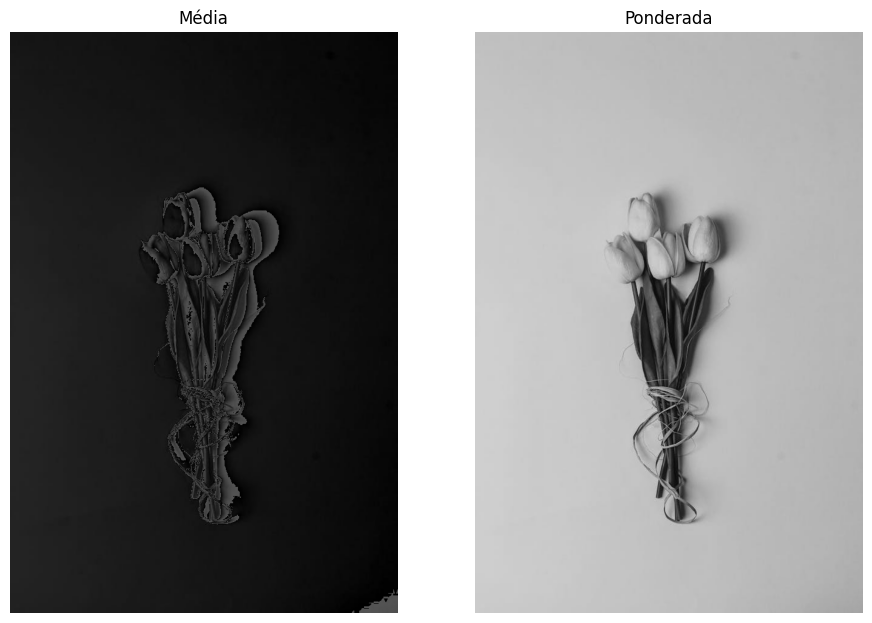

In [ ]:
# Método média
img_4m= cv2.imread(img4a)
greyMedia4 = rgb2gray(img_4m, 0)

# Método ponderado
img_4p= cv2.imread(img4a)
greyPond4 = rgb2gray(img_4p, 1)


# Plotar as imagens
plt.figure(figsize=(17, 10))

plt.subplot(131), plt.imshow(greyMedia4), plt.title('Média'), plt.axis('off')
plt.subplot(132), plt.imshow(greyPond4), plt.title('Ponderada'), plt.axis('off')
plt.show()


### 2) Converter as imagens de RGB para HSI




#### Imagem 1

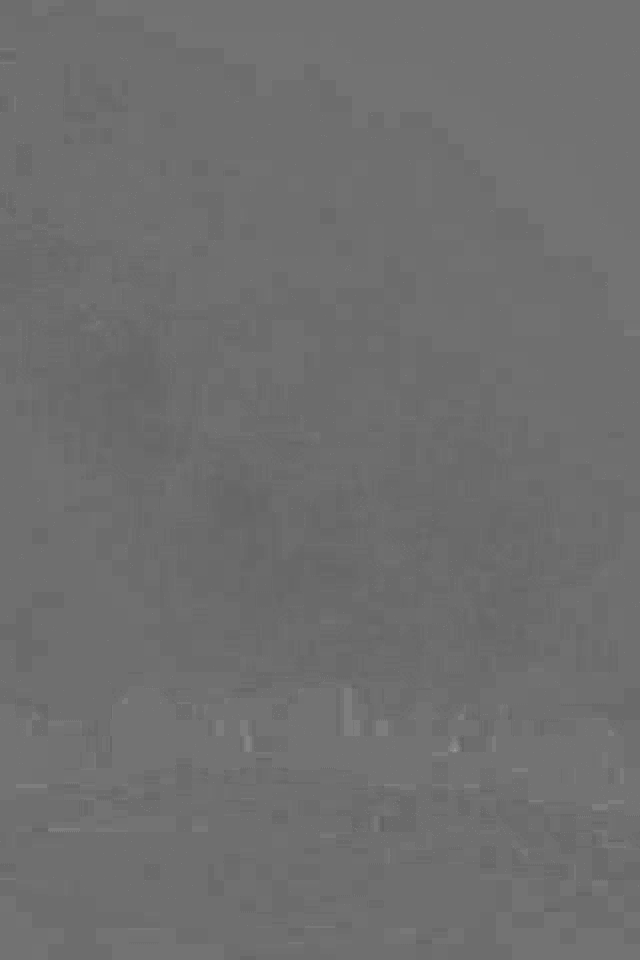

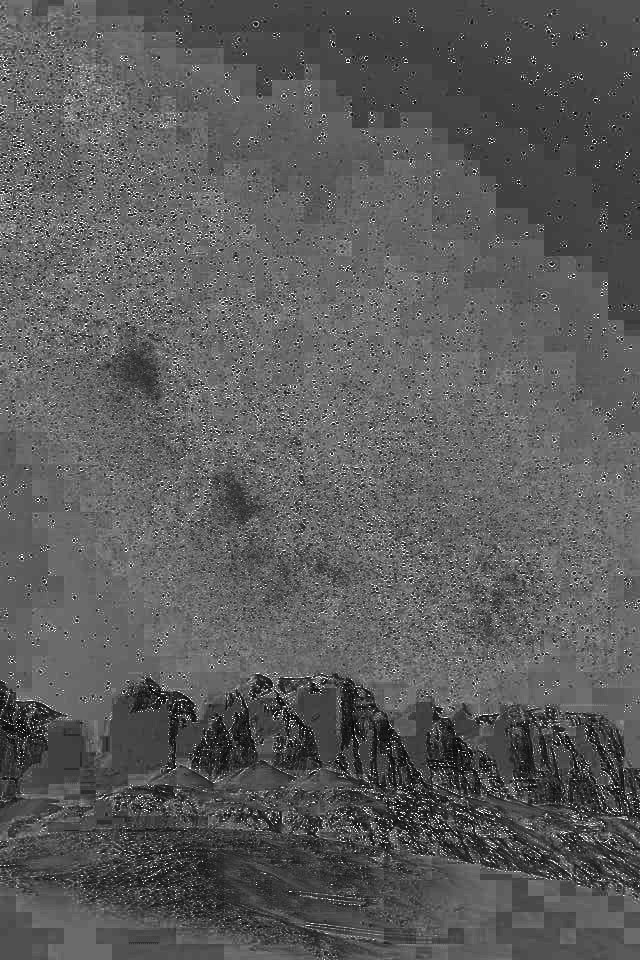

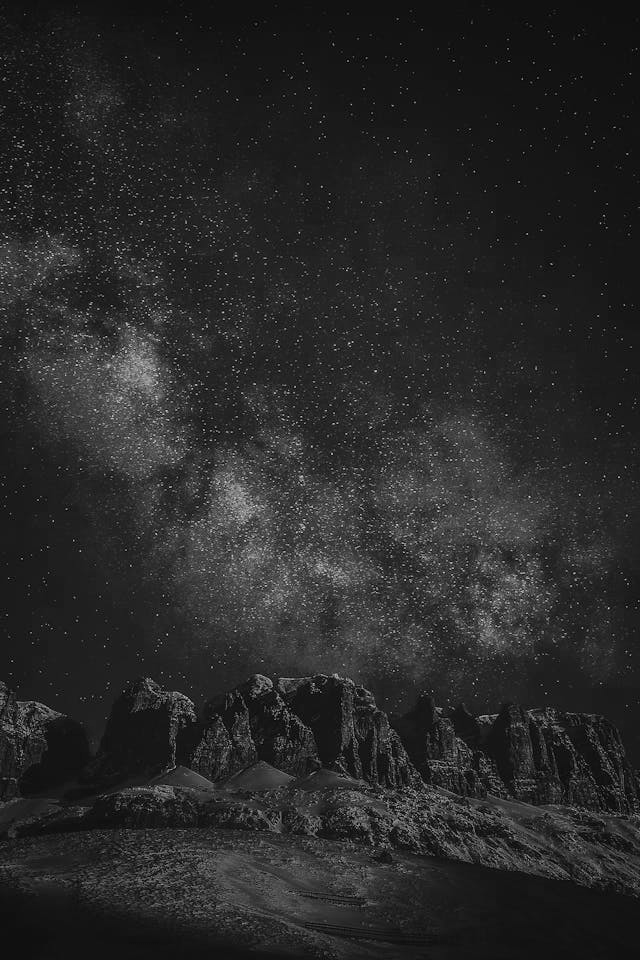

In [ ]:
# Converter para HSI
HSI_1 = cv2.cvtColor(imag_1a, cv2.COLOR_BGR2HSV)
H, S, I = cv2.split(HSI_1)
cv2_imshow(H)
cv2_imshow(S)
cv2_imshow(I)


#### Imagem 2

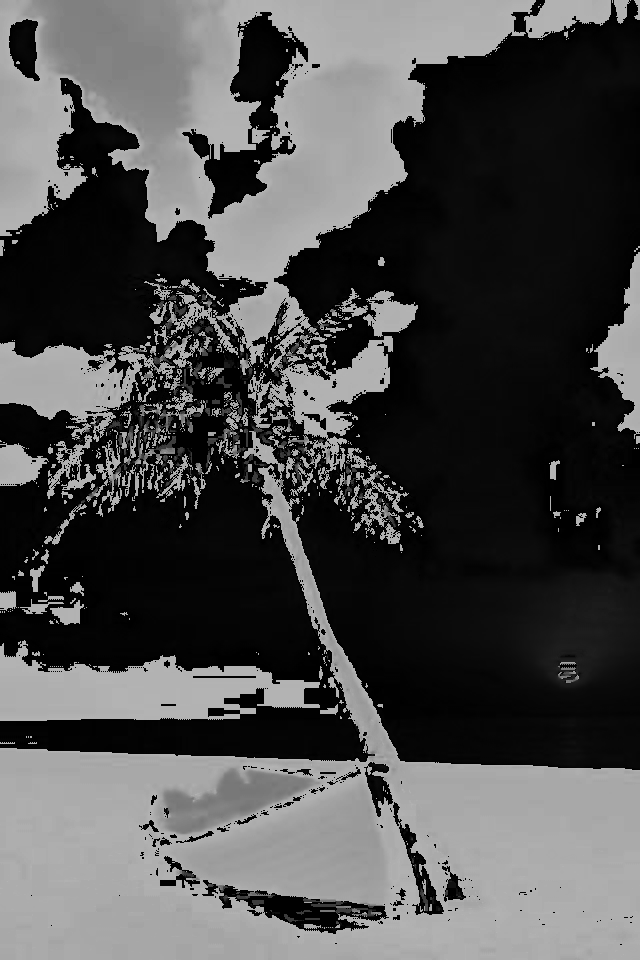

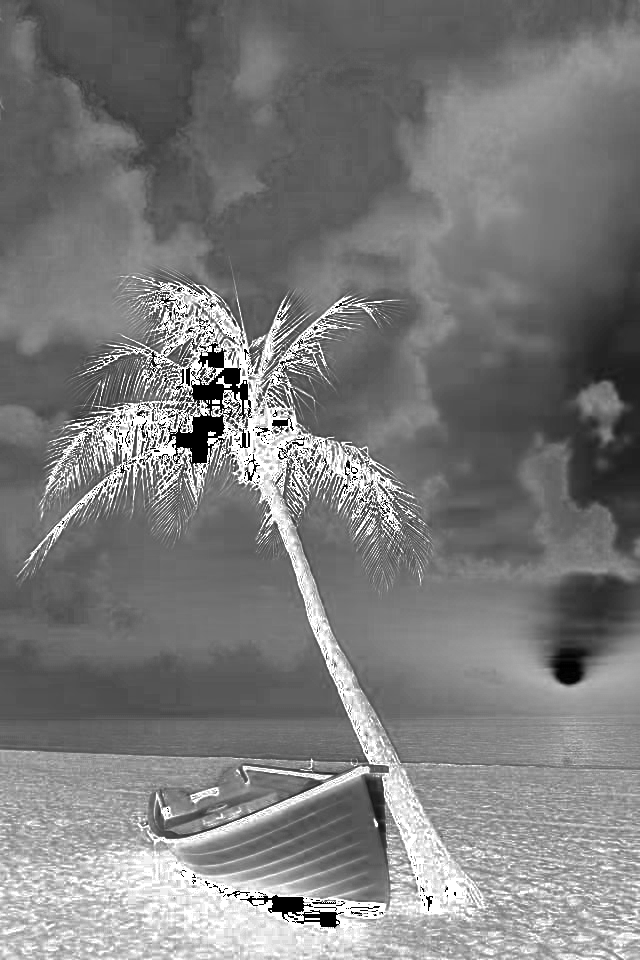

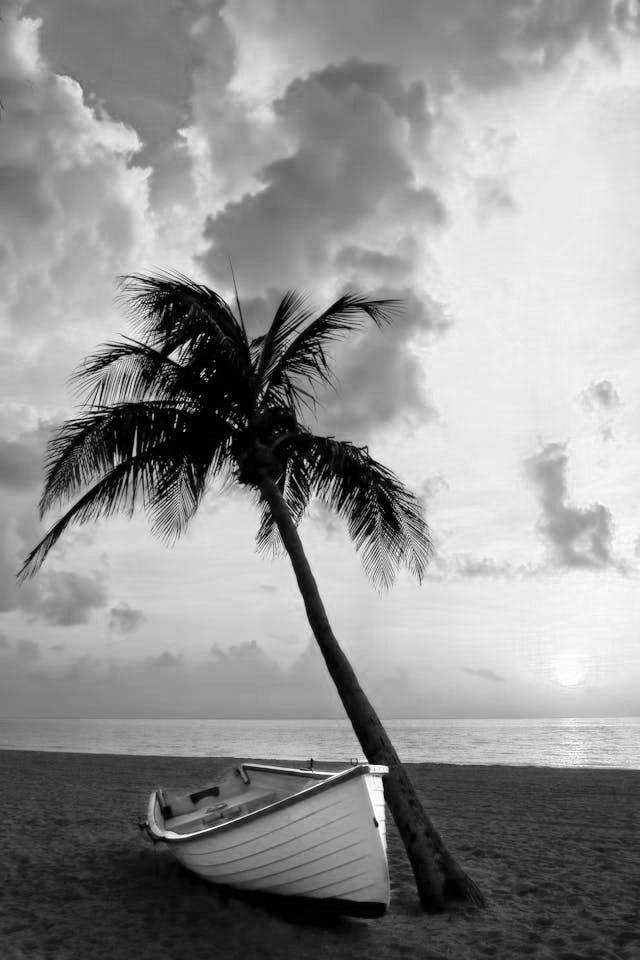

In [ ]:
HSI_2 = cv2.cvtColor(imag_2a, cv2.COLOR_BGR2HSV)
H,S,I = cv2.split(HSI_2)
cv2_imshow(H)
cv2_imshow(S)
cv2_imshow(I)


#### Imagem 3

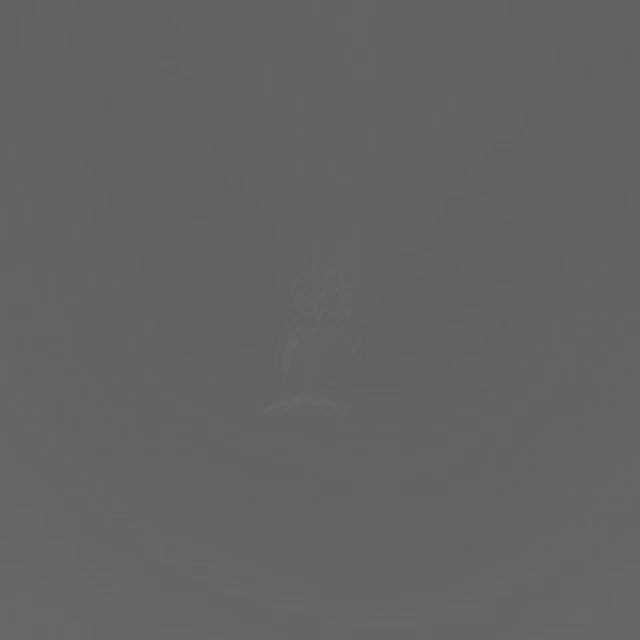

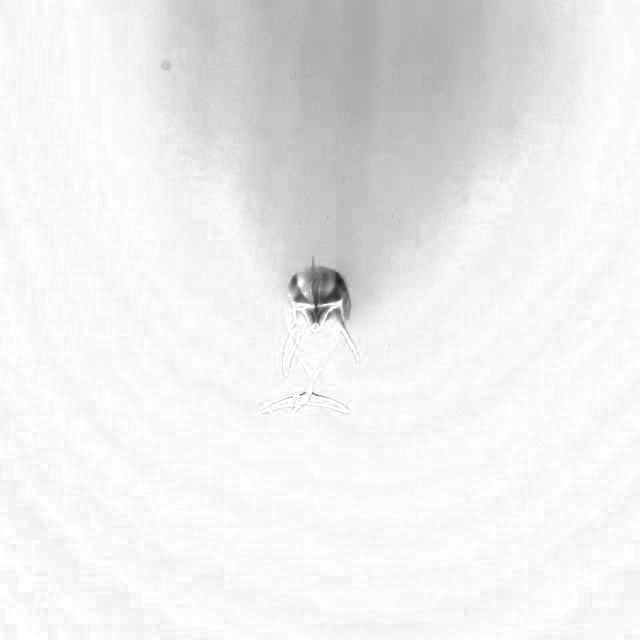

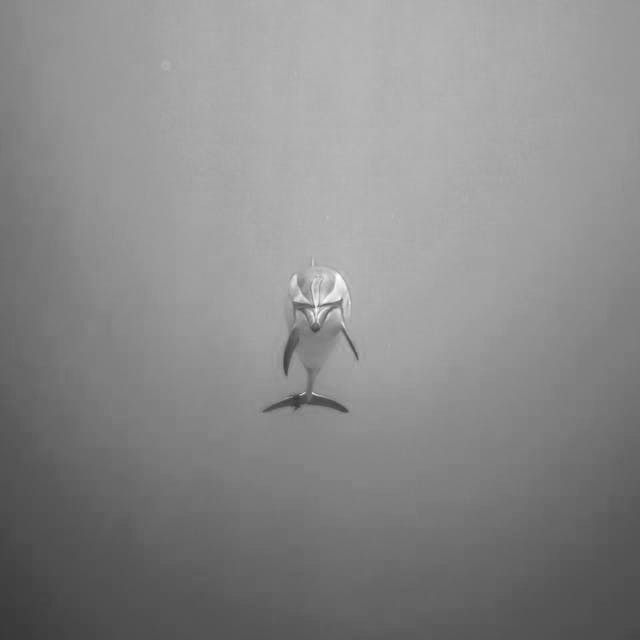

In [ ]:
HSI_3 = cv2.cvtColor(imag_3a, cv2.COLOR_BGR2HSV)
H,S,I = cv2.split(HSI_3)
cv2_imshow(H)
cv2_imshow(S)
cv2_imshow(I)

#### Imagem 4

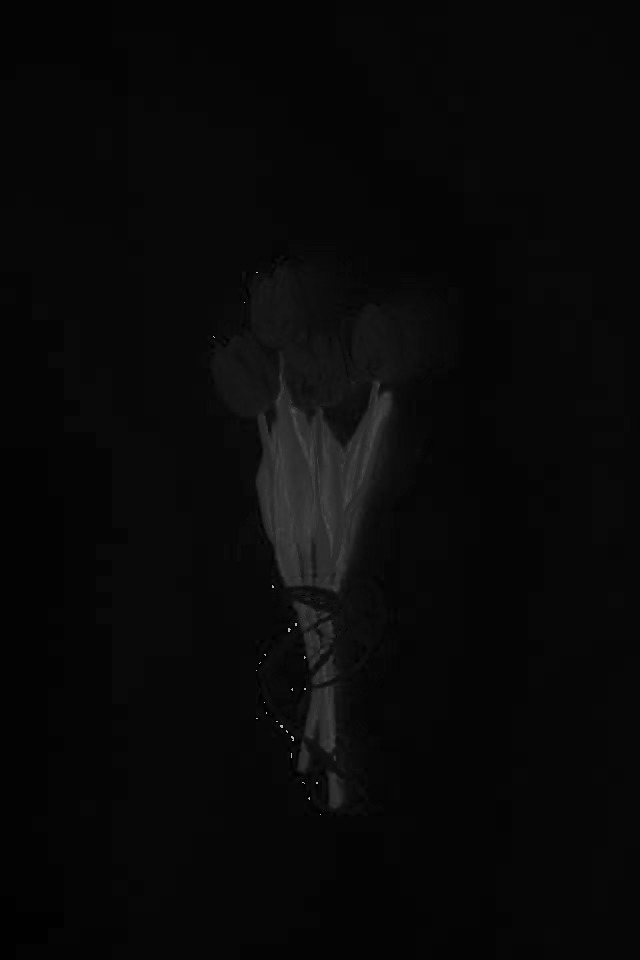

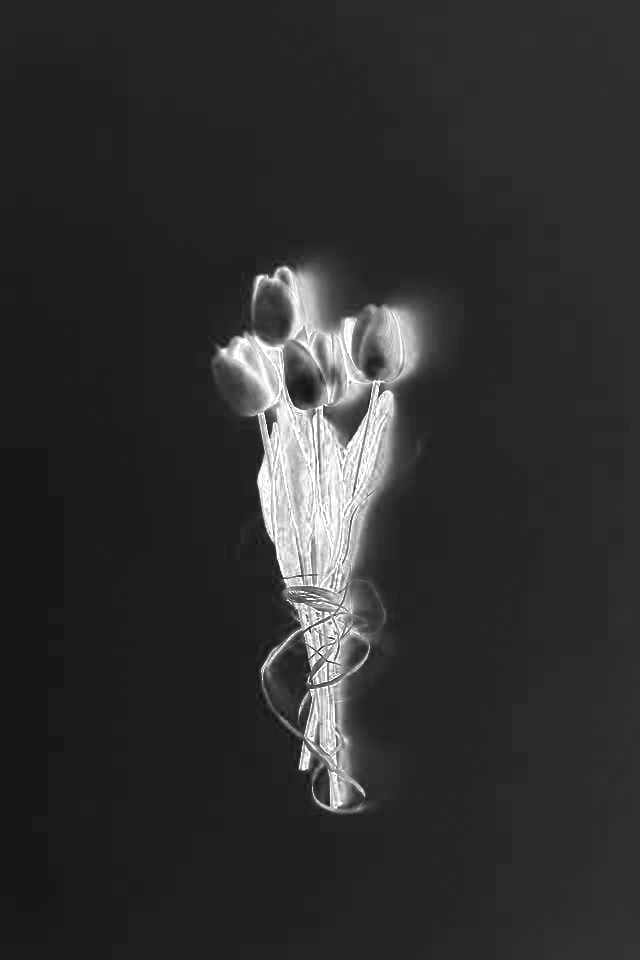

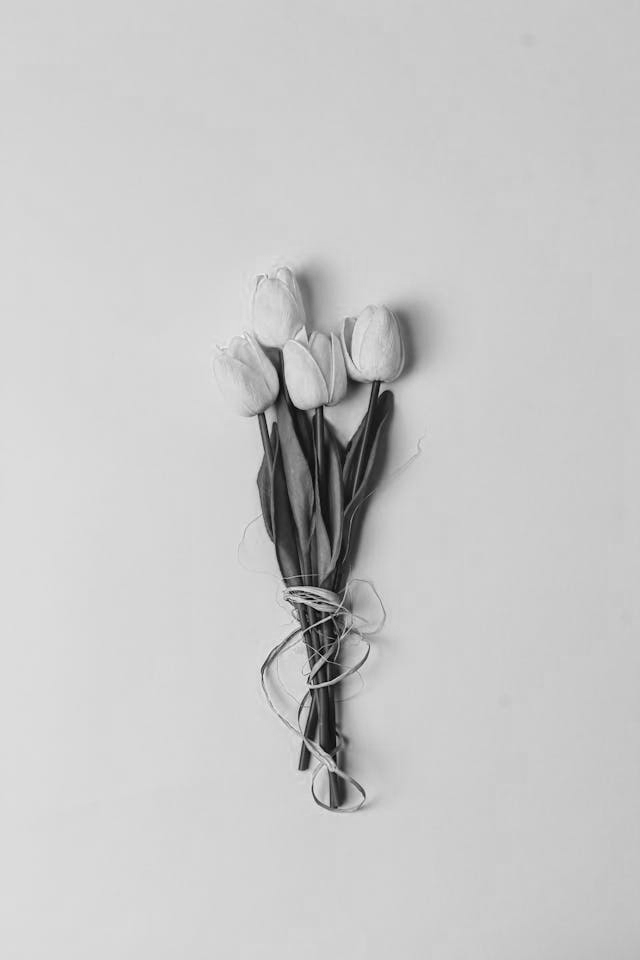

In [ ]:
HSI_4 = cv2.cvtColor(imag_4a, cv2.COLOR_BGR2HSV)
H,S,I = cv2.split(HSI_4)
cv2_imshow(H)
cv2_imshow(S)
cv2_imshow(I)

### 3) Identificar as cores que tem na imagem (escolhendo as oito cores principais e apresentar em forma de histograma)

#### Imagem do círculo com as cores

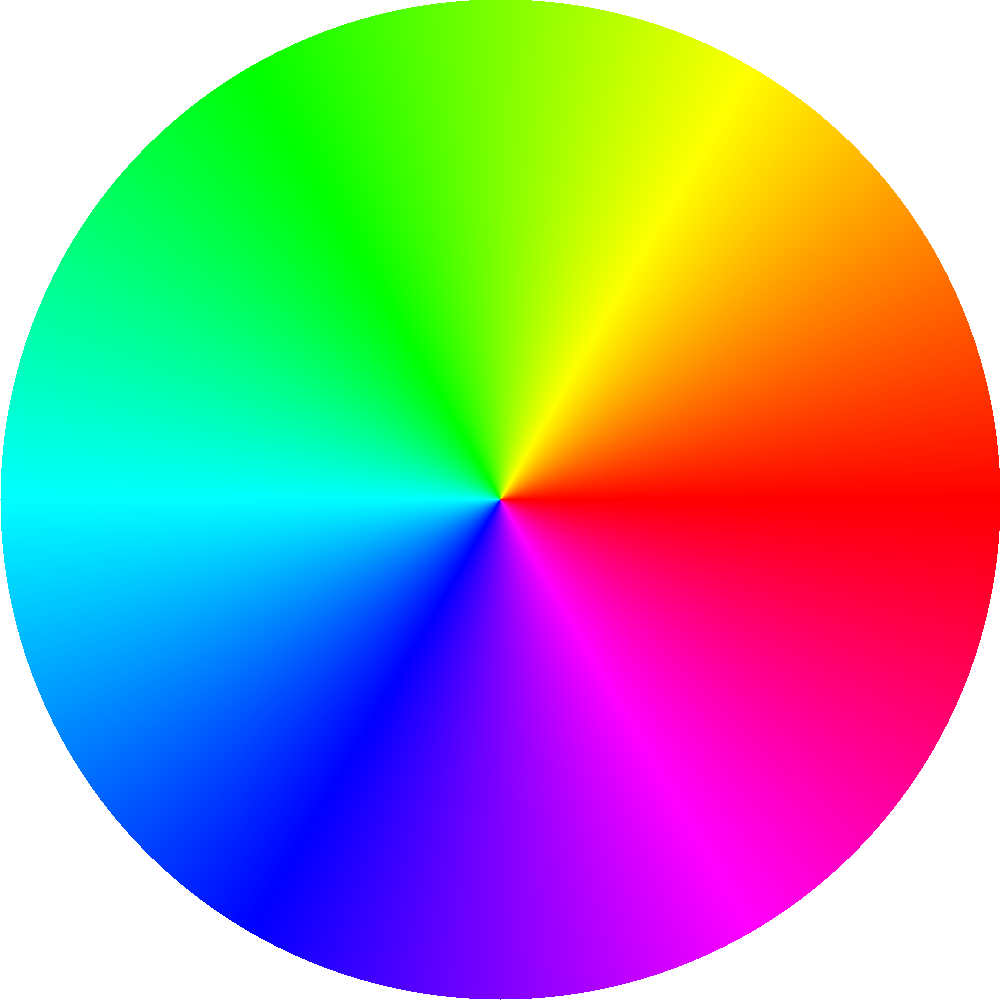

In [109]:
colors_image= "/content/drive/MyDrive/PIM/ATVD03/hue.png"

colors = cv2.imread(colors_image)

cv2_imshow(colors)

#### Indetificação das cores (8 principais)

red - Imagem Segmentada:


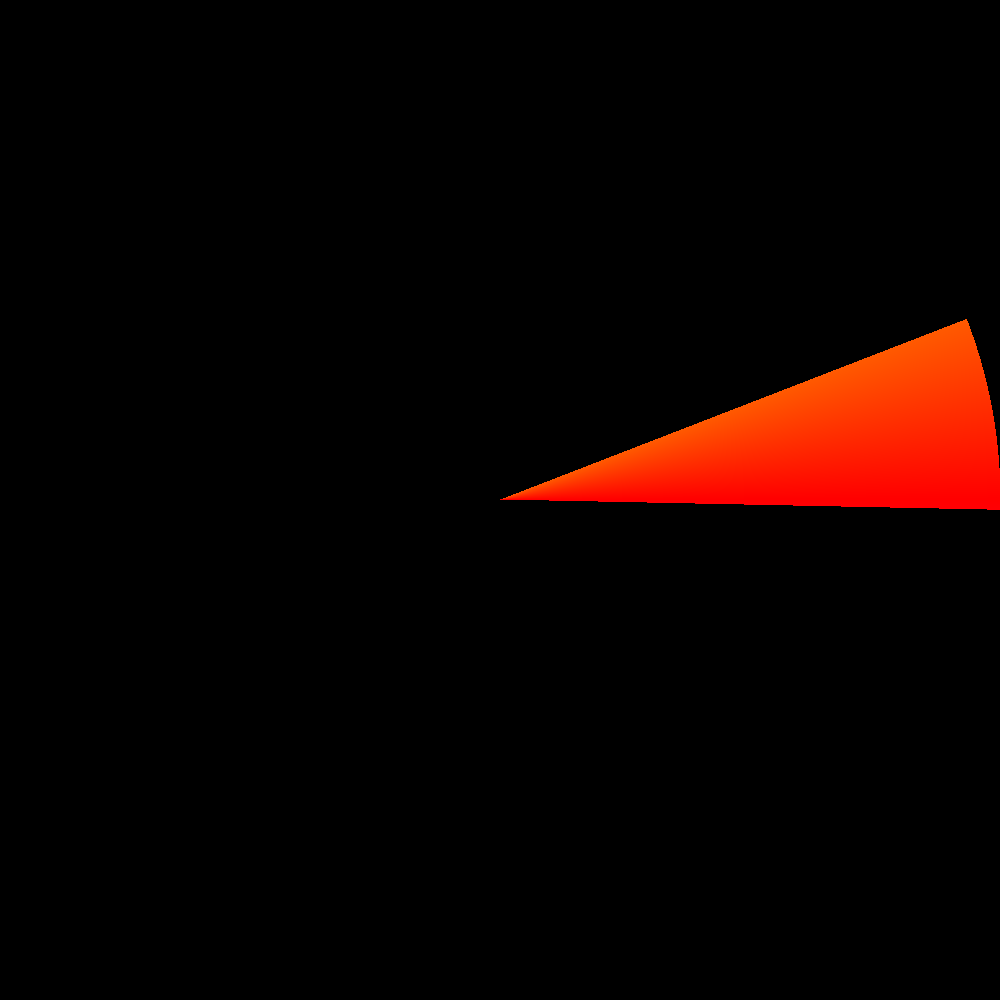

red - Máscara:


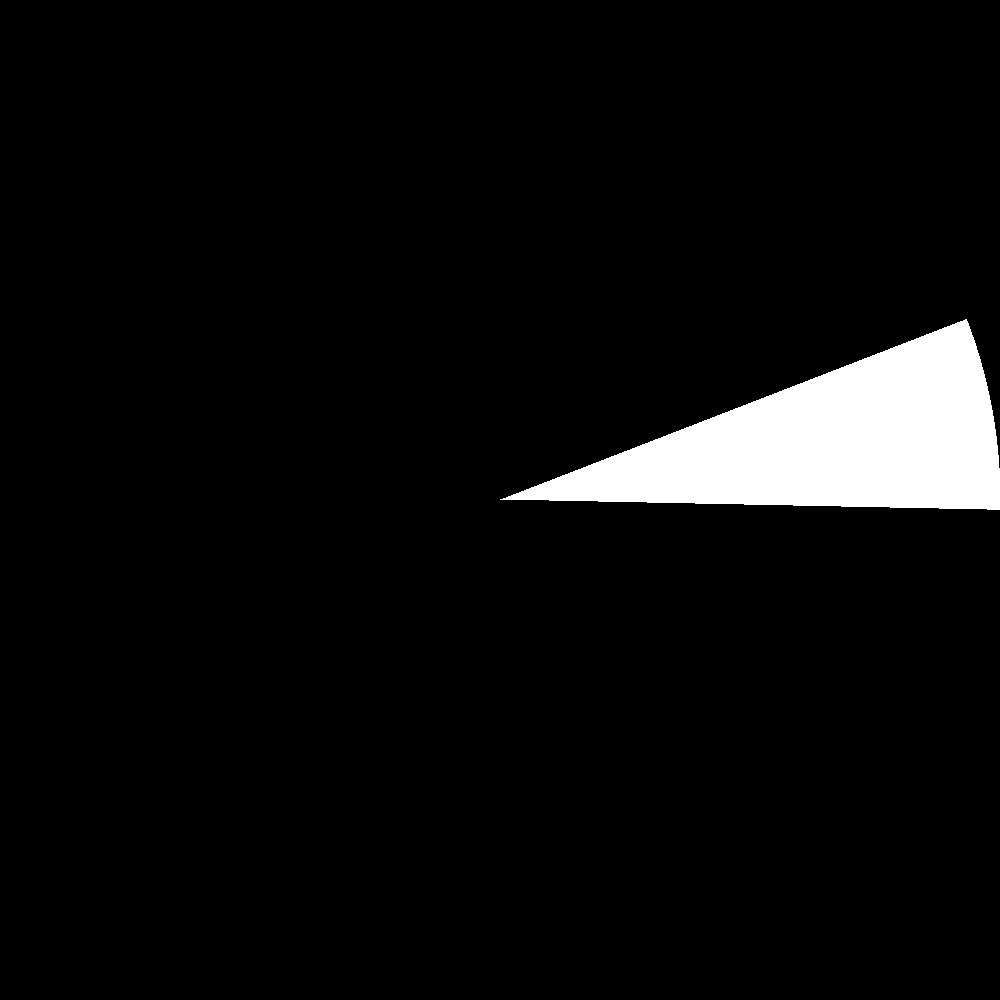

orange - Imagem Segmentada:


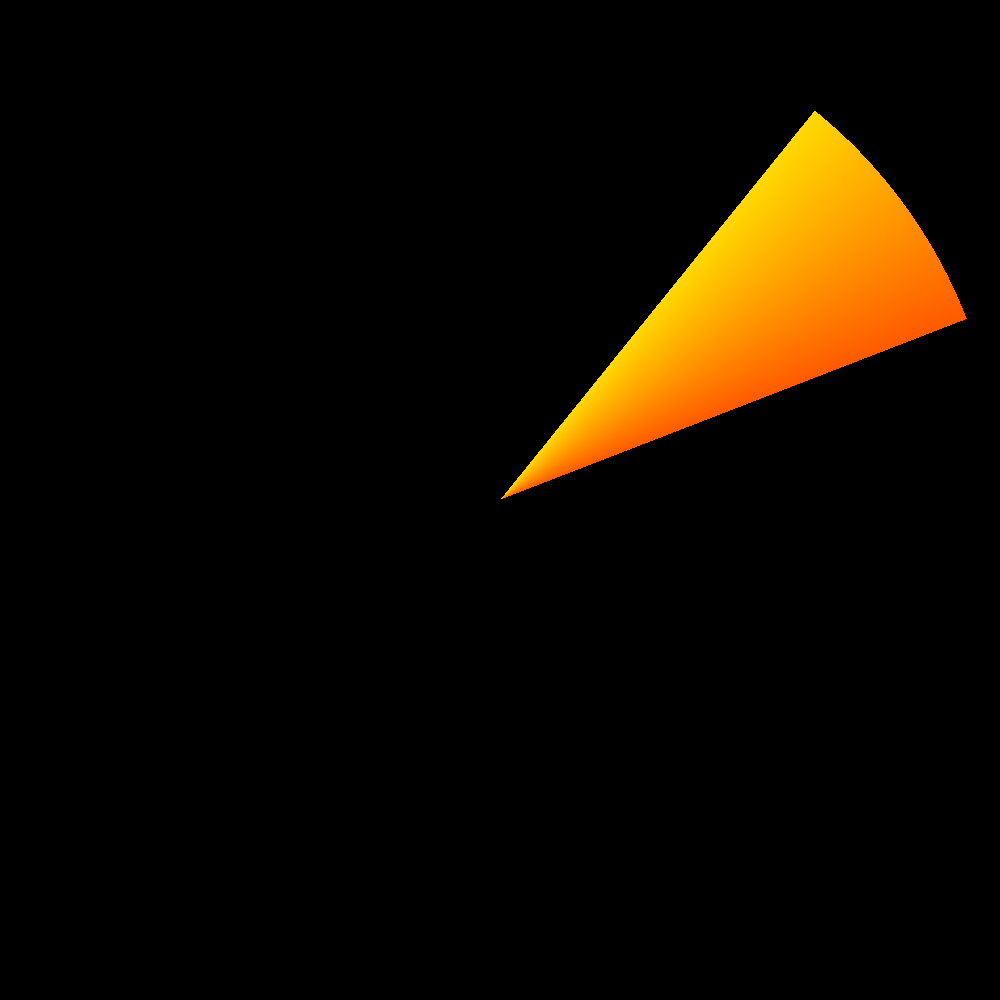

orange - Máscara:


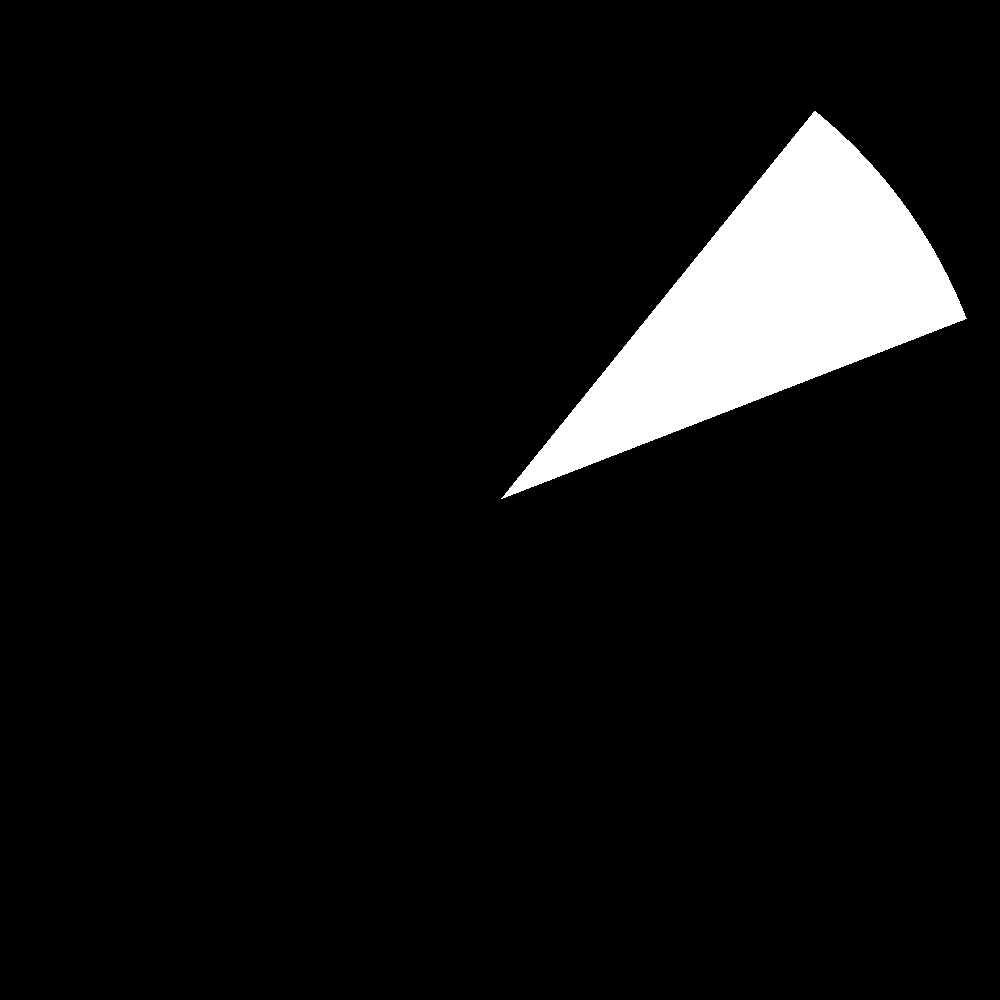

yellow - Imagem Segmentada:


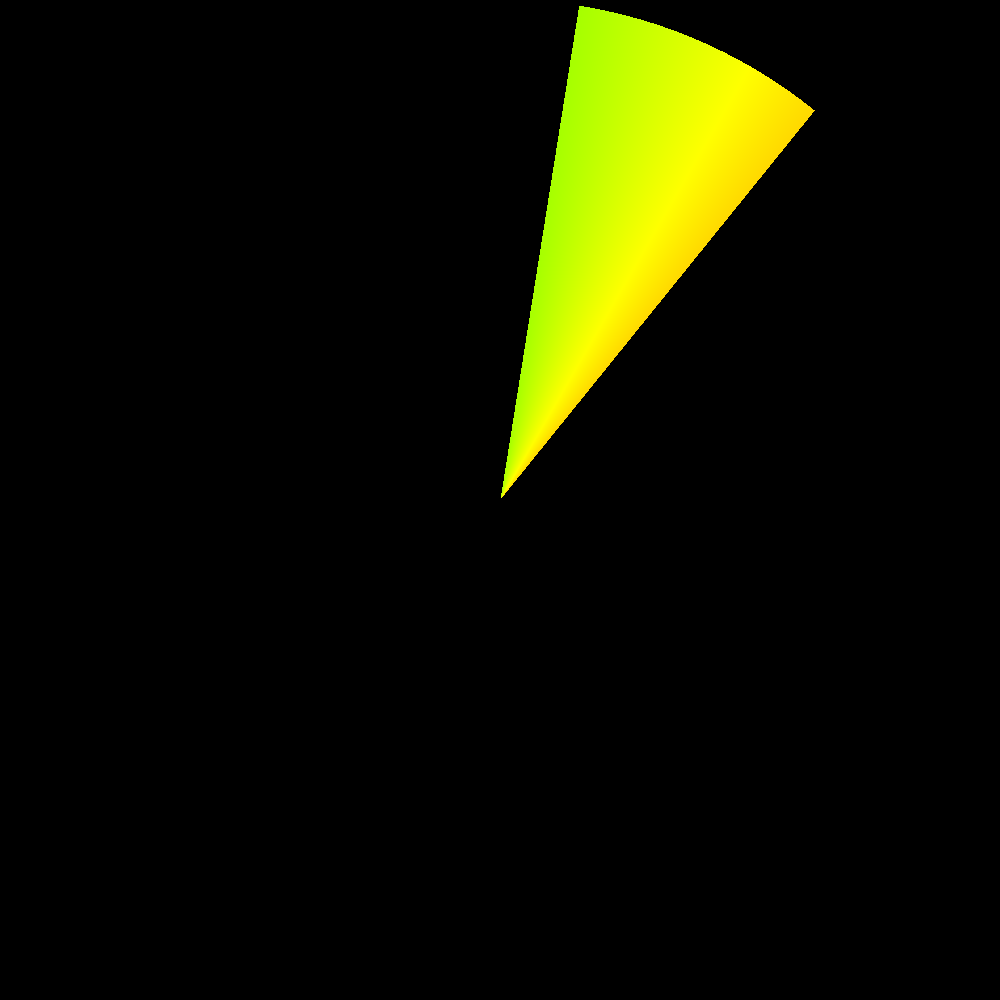

yellow - Máscara:


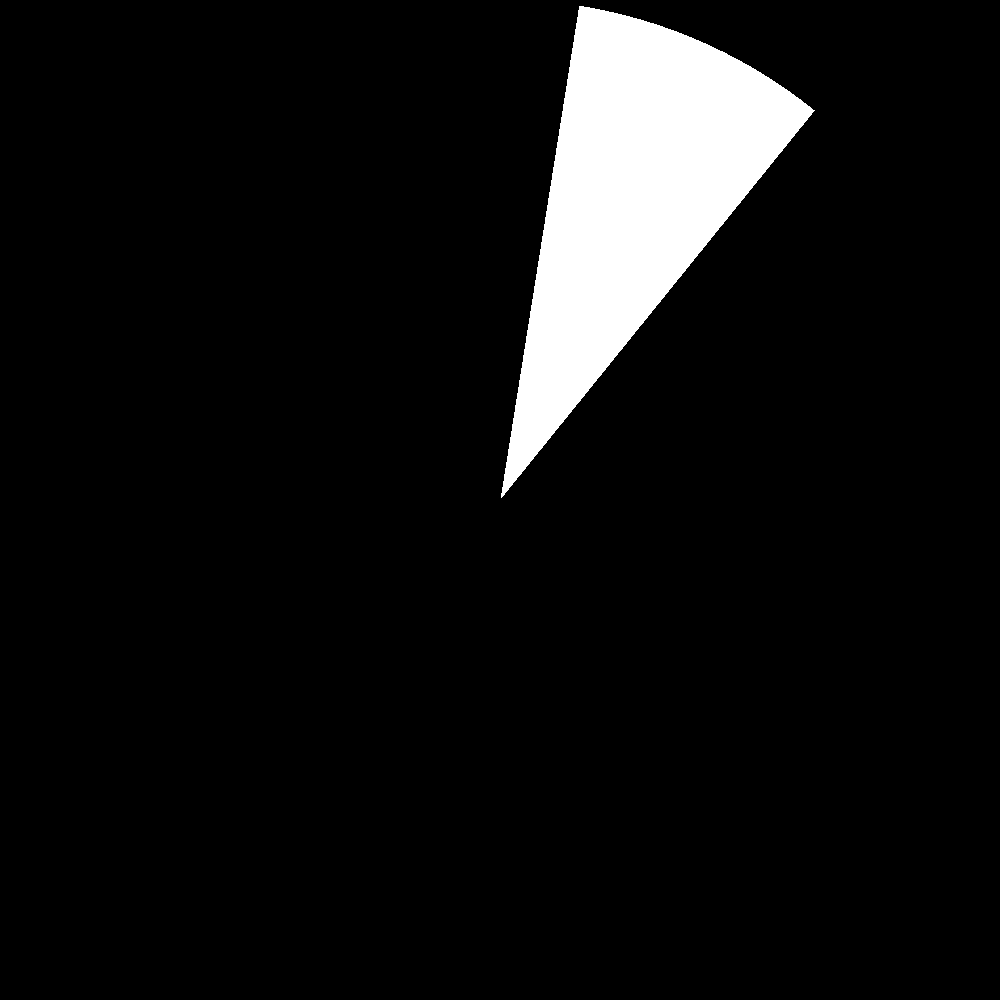

green - Imagem Segmentada:


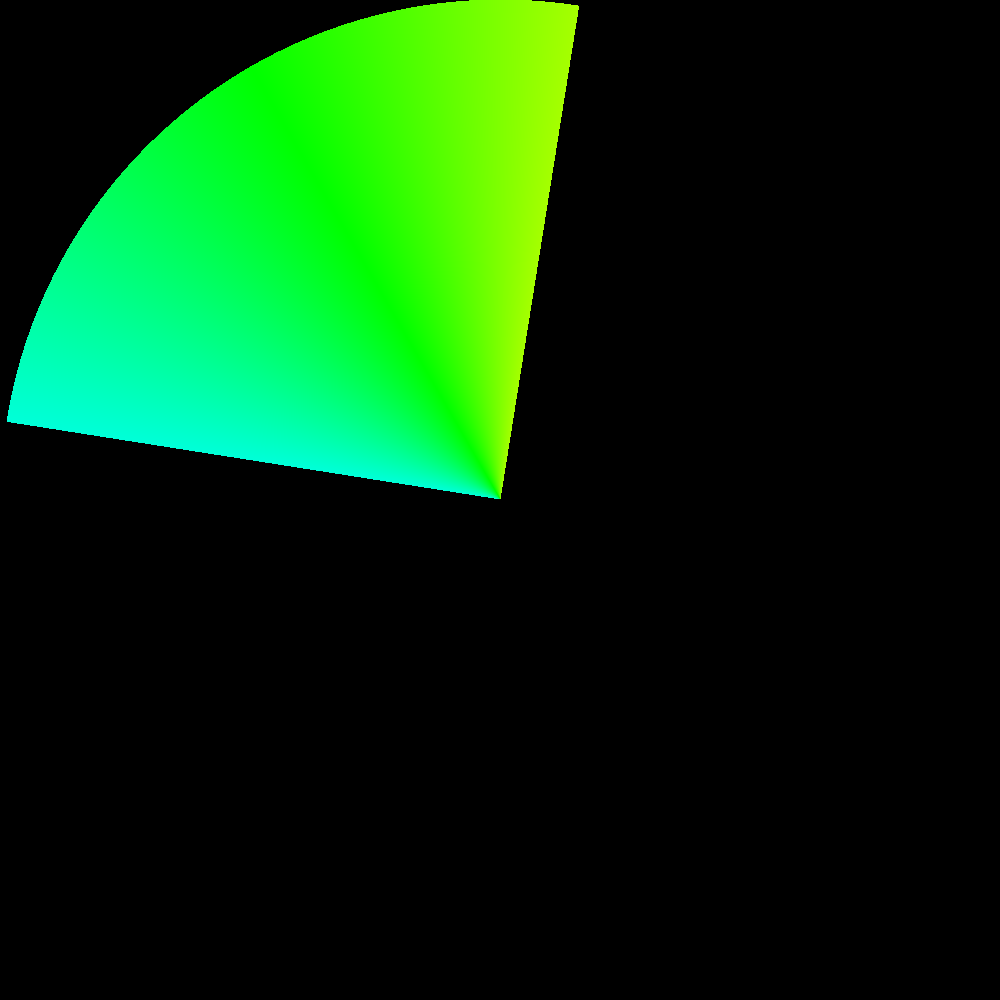

green - Máscara:


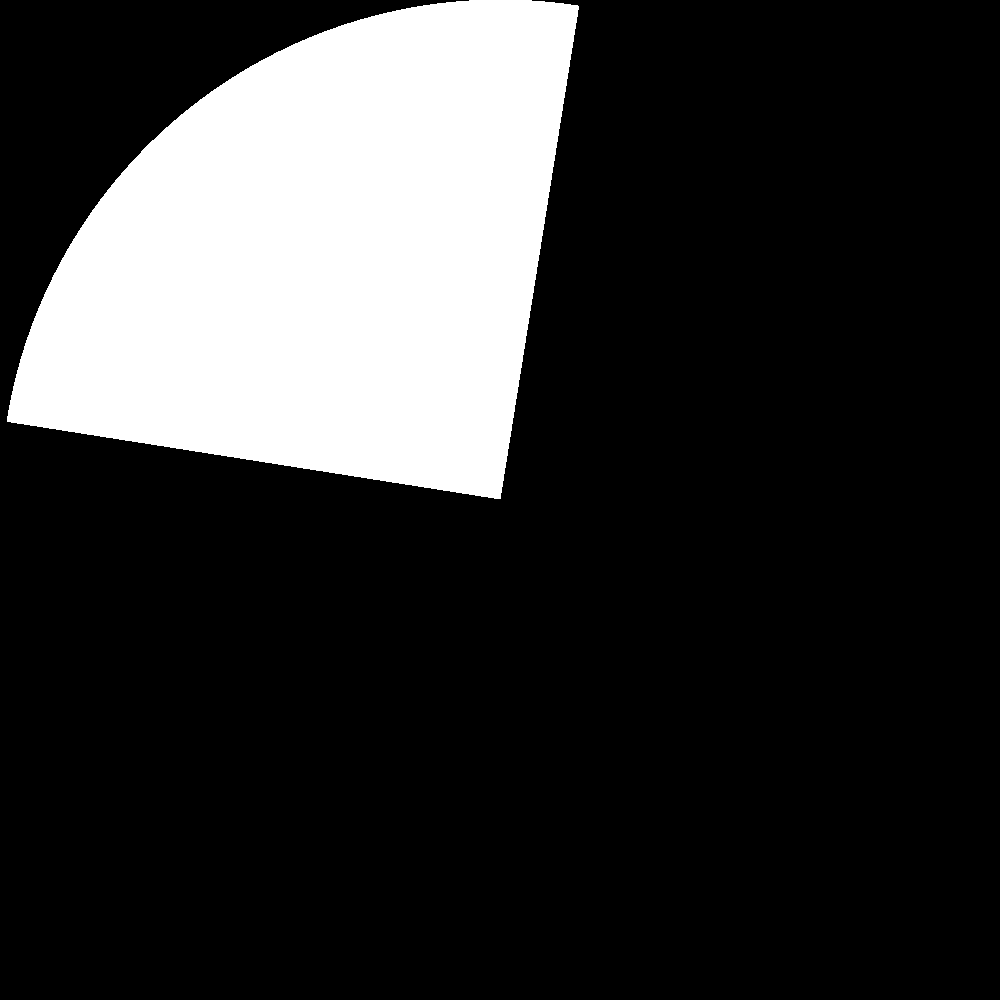

blue - Imagem Segmentada:


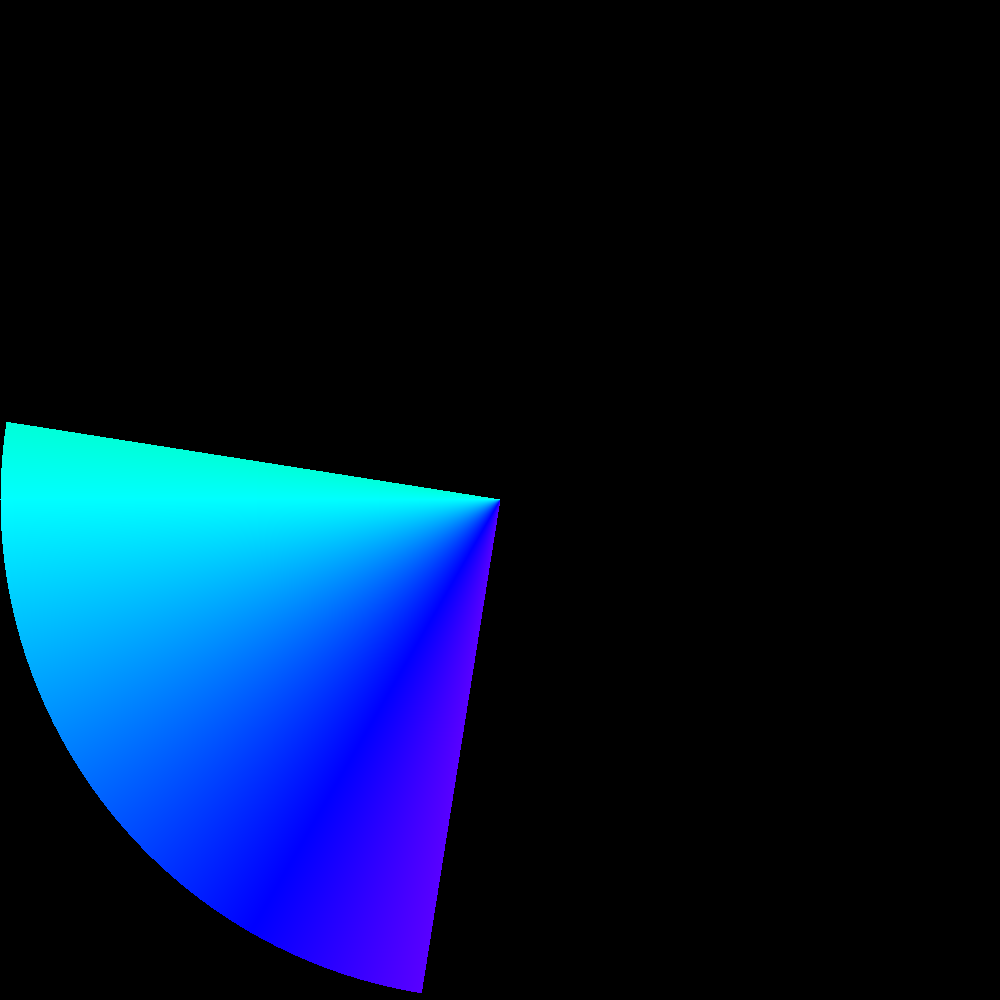

blue - Máscara:


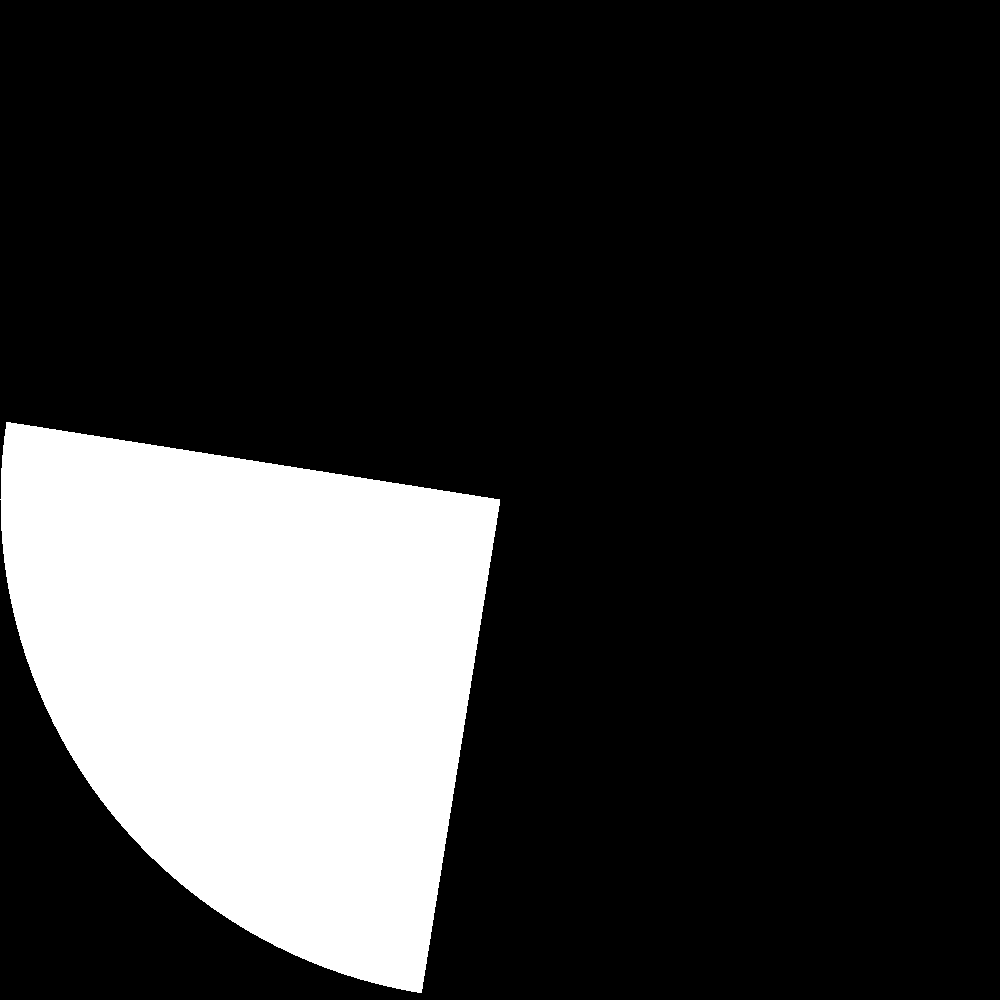

anil - Imagem Segmentada:


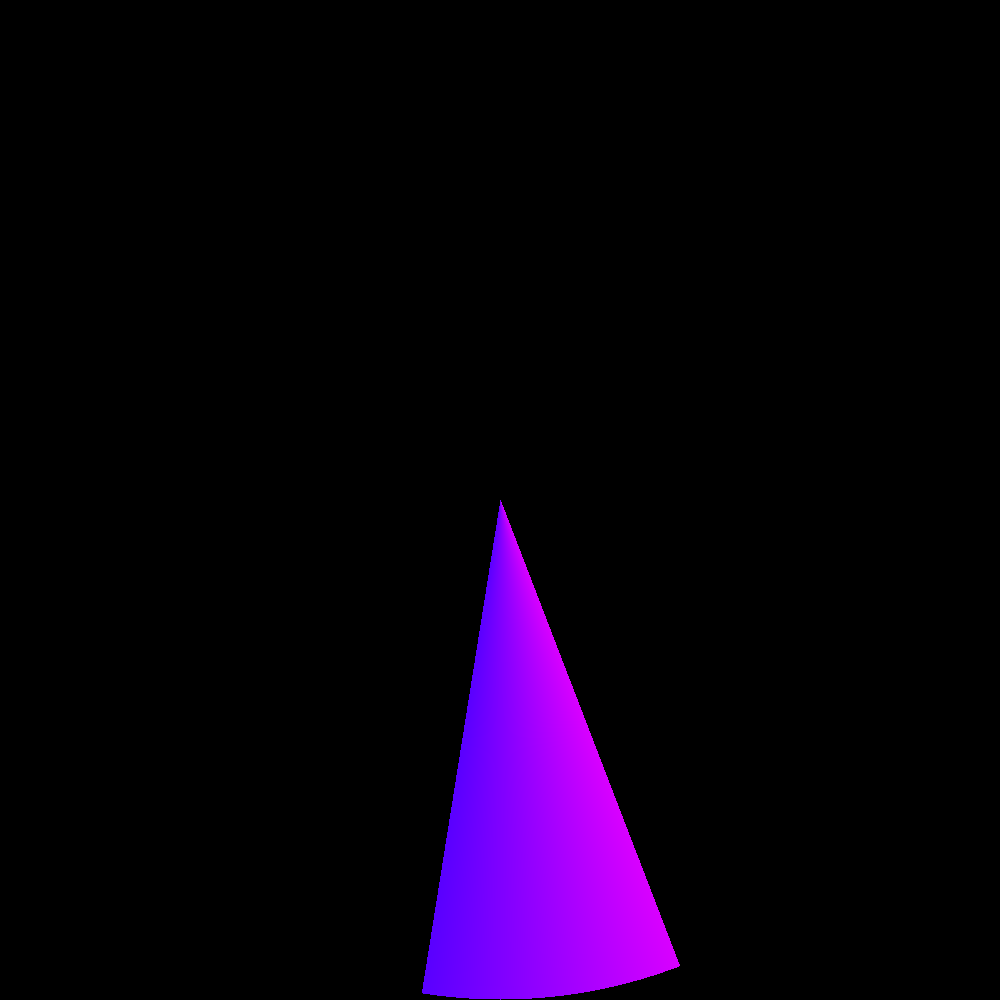

anil - Máscara:


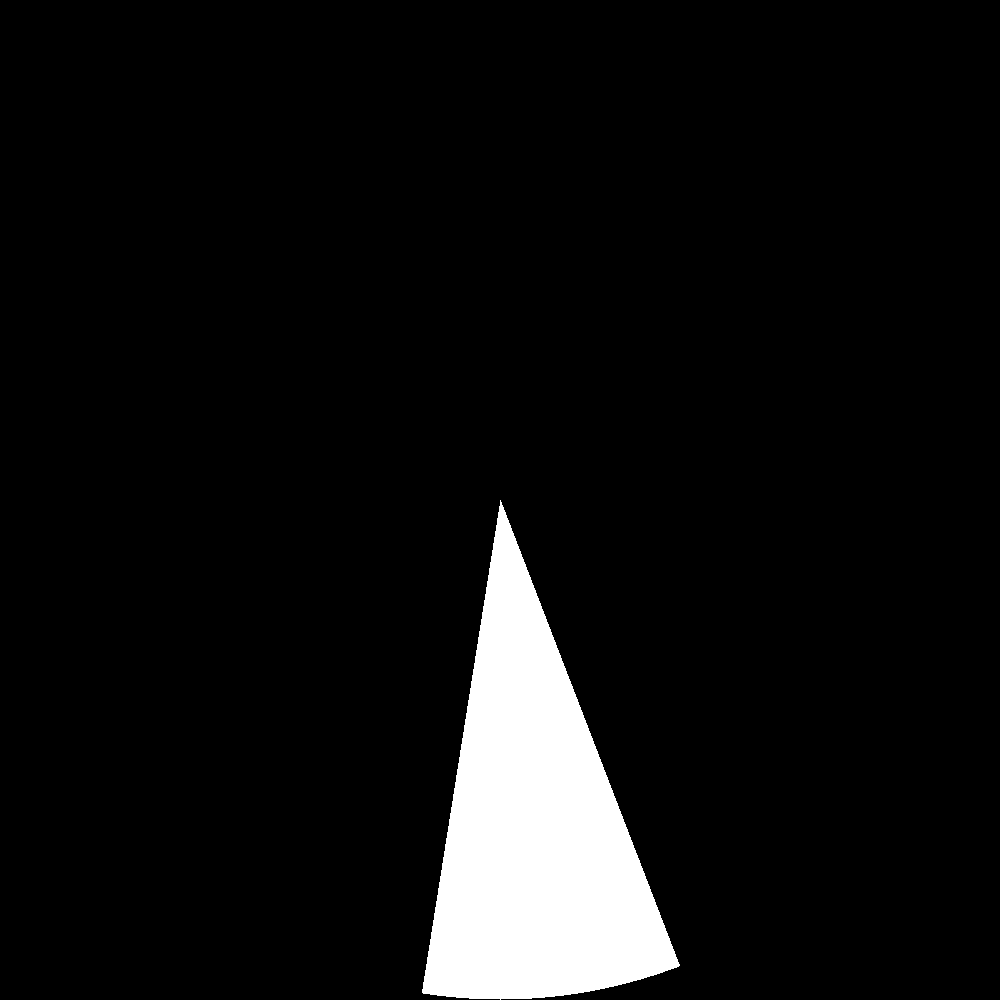

violet - Imagem Segmentada:


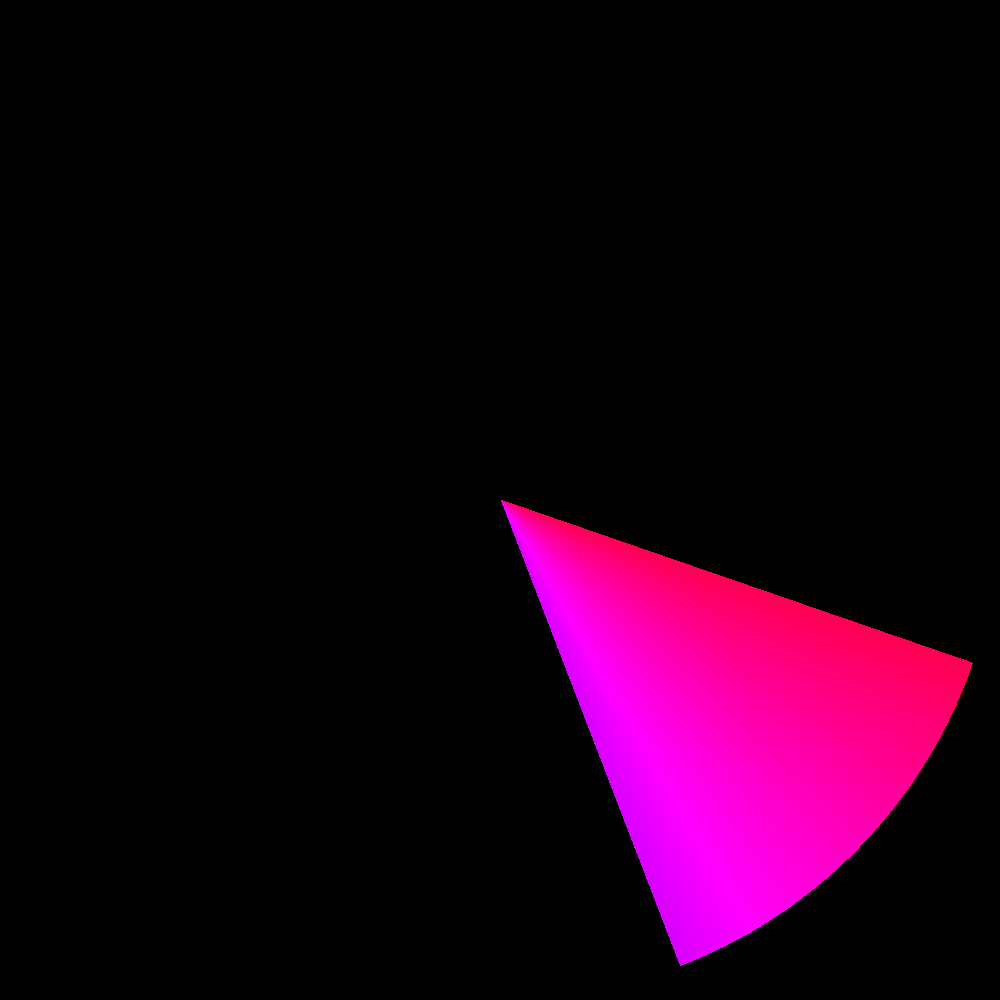

violet - Máscara:


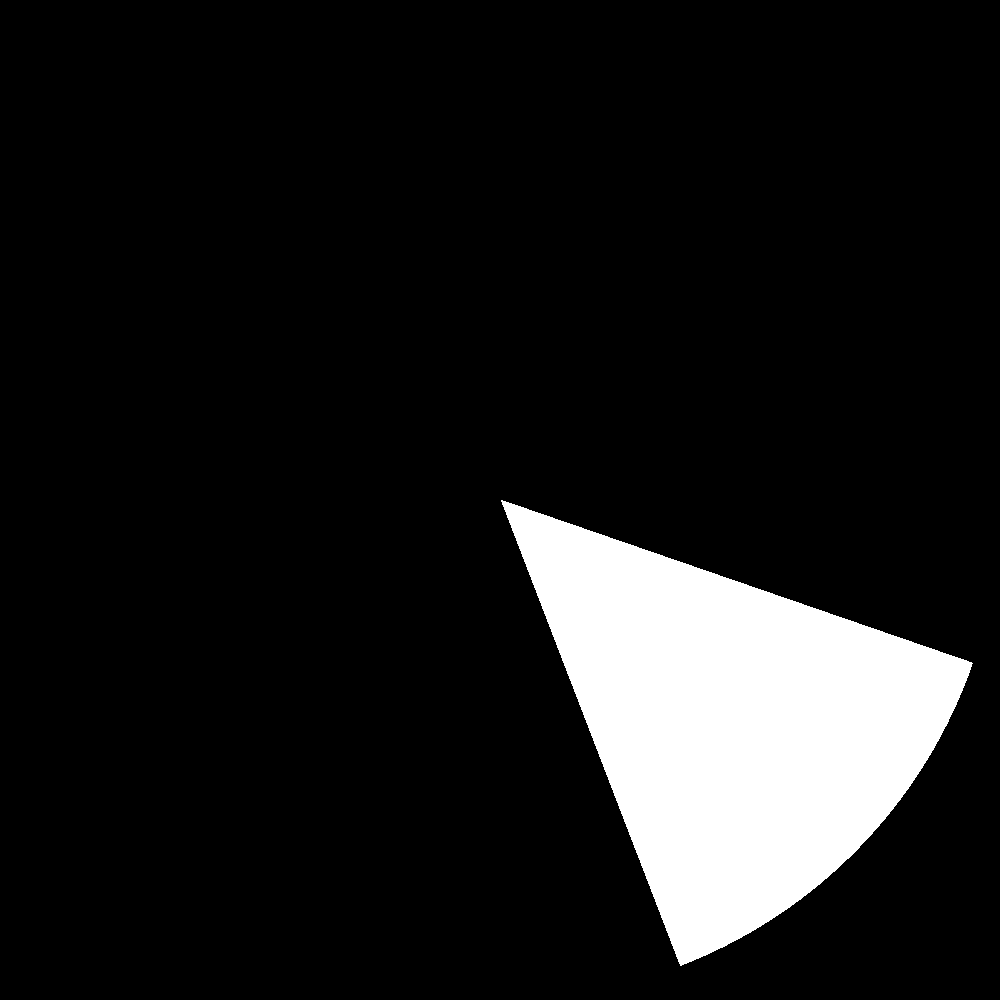

In [115]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


def image_mask(low, up, imagex):
    imagex_hsv = cv2.cvtColor(imagex, cv2.COLOR_BGR2HSV)
    lower = np.array(low, np.uint8)
    upper = np.array(up, np.uint8)
    color_x = cv2.inRange(imagex_hsv, lower, upper)
    img_conv = cv2.bitwise_and(imagex, imagex, mask=color_x)
    cv2_imshow(img_conv)

color_ranges = {
    'red': ([0, 50, 50], [10, 255, 255]),
    'orange': ([11, 100, 100], [25, 255, 255]),
    'yellow': ([26, 100, 100], [40, 255, 255]),
    'green': ([41, 100, 100], [85, 255, 255]),
    'blue': ([86, 100, 100], [130, 255, 255]),
    'anil': ([131, 100, 100], [145, 255, 255]),
    'violet': ([146, 100, 100], [170, 255, 255])
}

for color, (lower, upper) in color_ranges.items():
    mask = cv.inRange(hsv, np.array(lower), np.array(upper))
    segmented_image = cv.bitwise_and(image, image, mask=mask)
    print(color + " - Imagem Segmentada:")
    cv2_imshow(segmented_image)
    print(color + " - Máscara:")
    cv2_imshow(mask)


#### Histograma



*   HUE

O histograma do Matiz mostra a distribuição das cores principais presentes na imagem. Representa a tonalidade da cor, ou seja, a cor dominante percebida, como vermelho, verde ou azul. No código, o canal de matiz é extraído da imagem HSV.
Em algumas implementações, como no OpenCV, a matiz é normalmente representada em um intervalo de 0 a 179 para simplificar o armazenamento e o processamento.

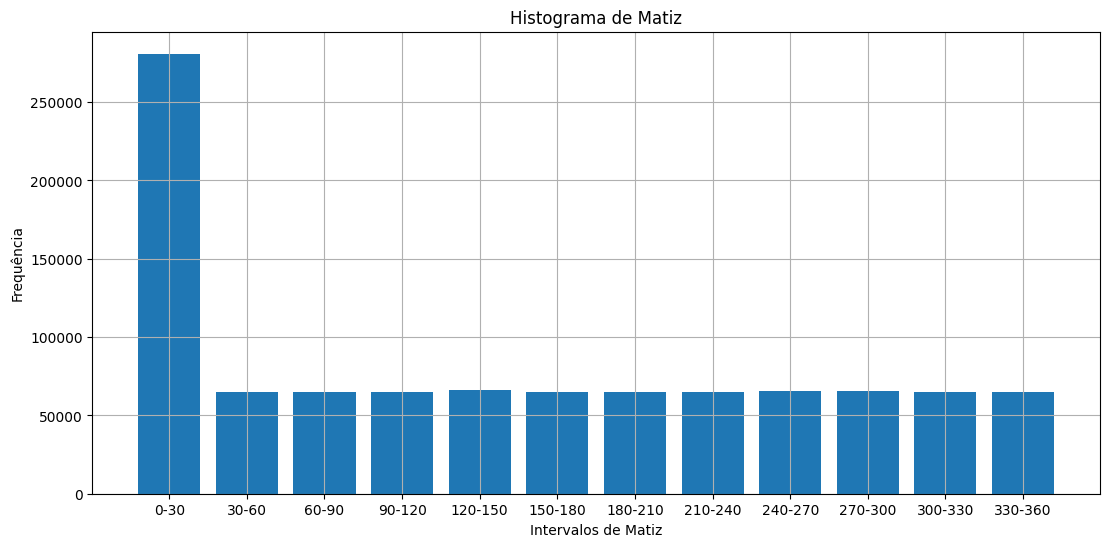

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

if __name__ == '__main__':
    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)
    h_image = cv2.extractChannel(hsv_image, 0)
    hist, bins = np.histogram(h_image.ravel(), 12, [0, 180])

    plt.figure(figsize=(13, 6))
    plt.bar(np.arange(len(hist)), hist, width=0.8, align='center')
    plt.grid()
    plt.title('Histograma de Matiz')
    plt.xlabel('Intervalos de Matiz')
    plt.ylabel('Frequência')
    plt.xticks(np.arange(12), ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360'])
    plt.show()




*   SATURATION:
Refere-se à intensidade da cor. Valores mais altos indicam cores mais "puras" ou "vivas", enquanto valores mais baixos indicam cores mais "desbotadas" ou "acizentadas". No código, o canal de saturação é extraído da imagem HSV.
A saturação, no espaço de cores HSV, é um valor que varia de 0 a 100% ou de 0 a 1, dependendo da convenção usada. Ela indica a pureza ou intensidade da cor. Um valor de saturação mais alto significa uma cor mais "pura" ou "vibrante", enquanto um valor mais baixo se aproxima do cinza.


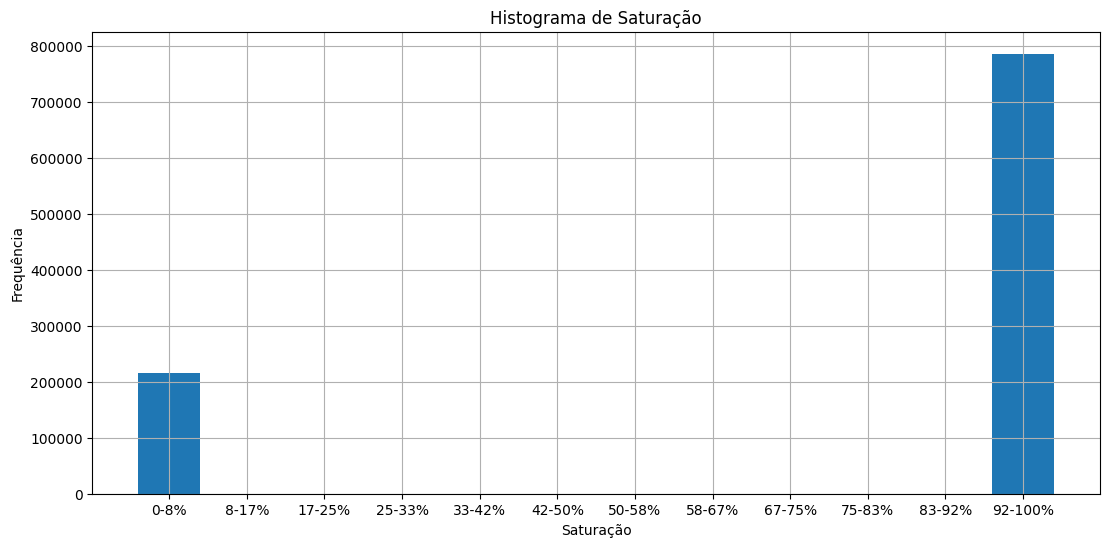

In [107]:
if __name__ == '__main__':
    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)


    s_image = cv2.extractChannel(hsv_image, 1)
    hist, bins = np.histogram(s_image.ravel(), 12, [0, 256])

    plt.figure(figsize=(13, 6))
    plt.bar(np.arange(len(hist)), hist, width=0.8, align='center')
    plt.grid()
    plt.title('Histograma de Saturação')
    plt.xlabel('Saturação')
    plt.ylabel('Frequência')

    plt.xticks(np.arange(12), ['0-8%', '8-17%', '17-25%', '25-33%', '33-42%', '42-50%', '50-58%', '58-67%', '67-75%', '75-83%', '83-92%', '92-100%'])

    plt.show()




*   VALUE:
Indica o brilho da cor. Valores mais altos representam cores mais claras, enquanto valores mais baixos representam cores mais escuras. No código, o canal de valor é extraído da imagem HSV. Para representar o canal de Valor em um histograma, precisamos escolher intervalos que cubram toda a faixa de valores possíveis para esse canal, que vai de 0 a 255 em uma imagem de 8 bits (8 bits são comuns em imagens digitais, onde cada canal pode ter valores entre 0 e 255).




> Histograma dividido em 12 intervalos de igual largura para cobrir essa faixa de 0 a 255. No entanto, em vez de mostrar os valores exatos de 0 a 255 nos rótulos do eixo x, o código utiliza intervalos percentuais de 8,33%, que correspondem a cada uma das 12 barras no histograma.



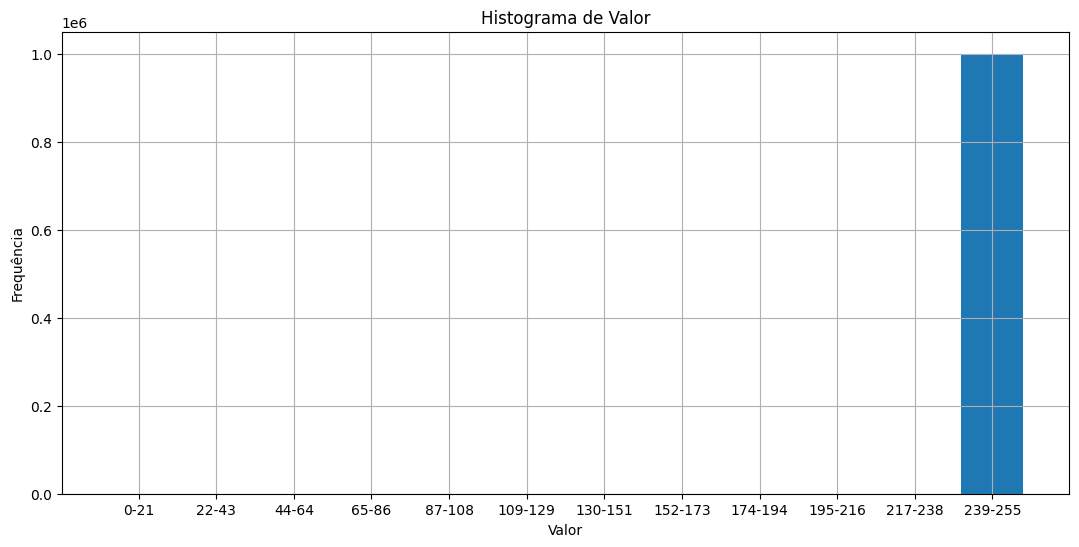

In [116]:
if __name__ == '__main__':
    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)

    v_image = cv2.extractChannel(hsv_image, 2)
    hist, bins = np.histogram(v_image.ravel(), 12, [0, 256])

    plt.figure(figsize=(13, 6))
    plt.bar(np.arange(len(hist)), hist, width=0.8, align='center')
    plt.grid()
    plt.title('Histograma de Valor')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

    plt.xticks(np.arange(12), ['0-21', '22-43', '44-64', '65-86', '87-108', '109-129', '130-151', '152-173', '174-194', '195-216', '217-238', '239-255'])

    plt.show()


###### Gráficos encurtados

O eixo horizontal do histograma vai de 0 a 12, cada barra representa um intervalo de 30 graus (180 graus / 12 barras = 15 graus por barra, mas com a representação normalizada de 0 a 180, equivale a 30 graus por barra)



> No espaço de cores HSV (Matiz, Saturação, Valor), a componente de matiz (Hue) é representada por um ângulo que varia de 0 a 360 graus. No entanto, muitas implementações normalizam esse intervalo para [0, 180] para facilitar o processamento, onde os valores de matiz de 0 a 180 representam as cores de 0 a 360 graus. Portanto, as cores próximas de 0 estão na faixa de 0 a 30 graus (ou 0 a 30/180 em uma representação normalizada).



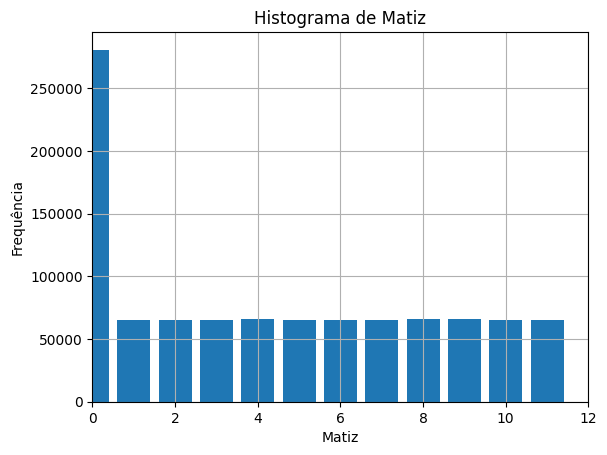

In [104]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

if __name__ == '__main__':

    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)
    h_image = cv2.extractChannel(hsv_image, 0)
    hist, bins = np.histogram(h_image.ravel(), 12, [0, 180])

    plt.bar(np.arange(len(hist)), hist)
    plt.grid()
    plt.title('Histograma de Matiz')
    plt.xlim([0, 12])
    plt.xlabel('Matiz')
    plt.ylabel('Frequência')
    plt.show()



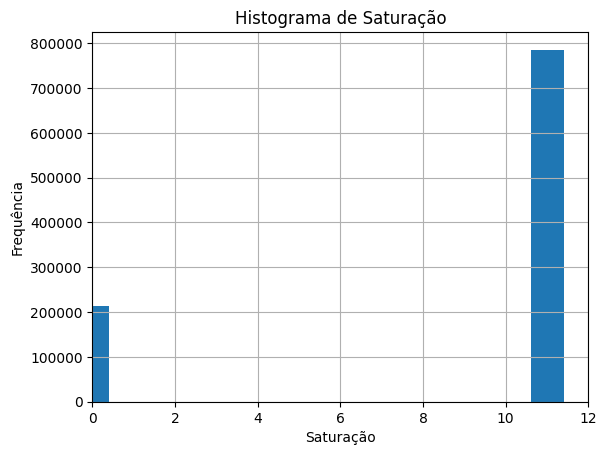

In [94]:
if __name__ == '__main__':

    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)
    s_image = cv2.extractChannel(hsv_image, 1)
    hist, bins = np.histogram(s_image.ravel(), 12, [0, 256])

    plt.bar(np.arange(len(hist)), hist)
    plt.grid()
    plt.title('Histograma de Saturação')
    plt.xlim([0, 12])
    plt.xlabel('Saturação')
    plt.ylabel('Frequência')
    plt.show()


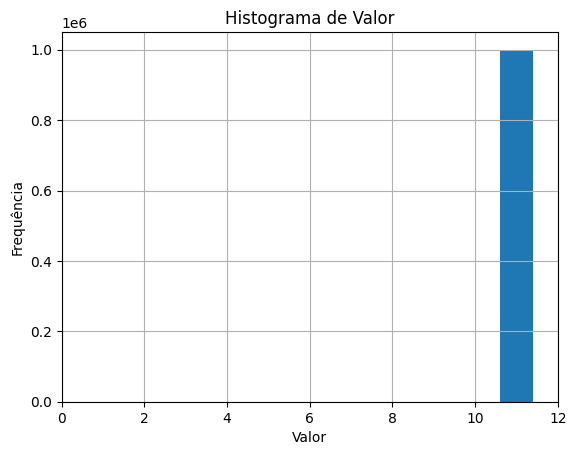

In [110]:
if __name__ == '__main__':

    hsv_image = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)

    v_image = cv2.extractChannel(hsv_image, 2)
    hist, bins = np.histogram(v_image.ravel(), 12, [0, 256])

    plt.bar(np.arange(len(hist)), hist)
    plt.grid()
    plt.title('Histograma de Valor')
    plt.xlim([0, 12])
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.show()


##### Histograma de toda imagem

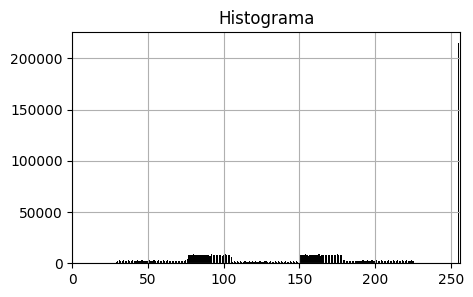

In [62]:
imgGray1 = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
def histograma(imagem):
    histogram, _ = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return histogram

hist_1 = histograma(imgGray1)
plt.figure(figsize=(5, 3))
plt.title("Histograma")
plt.bar(np.arange(256), hist_1, color='black')
plt.xlim([0, 256])
plt.grid(True)

### 4) Identificar os objetos usando as cores

#### Imagem 1

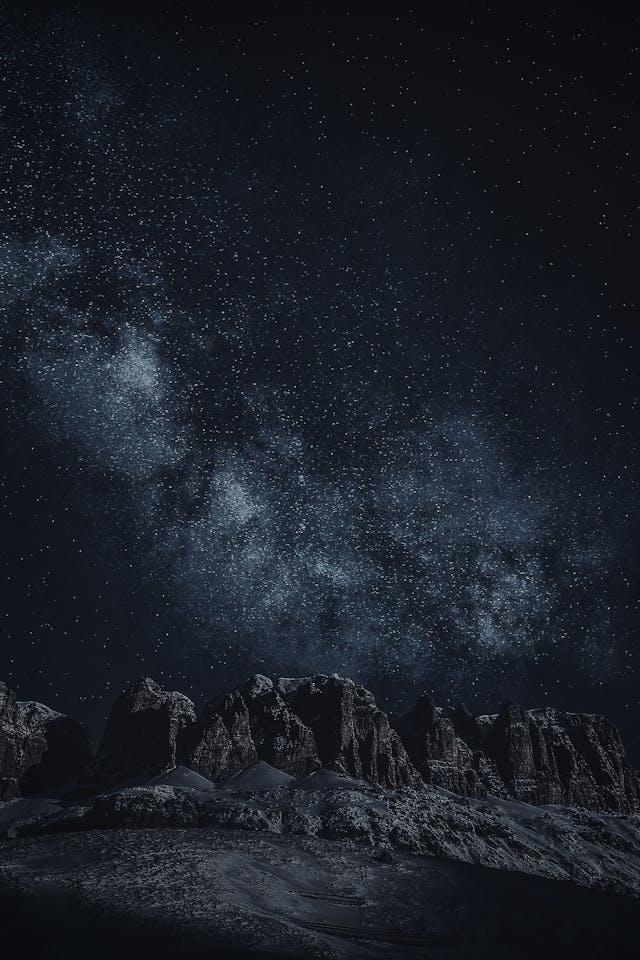

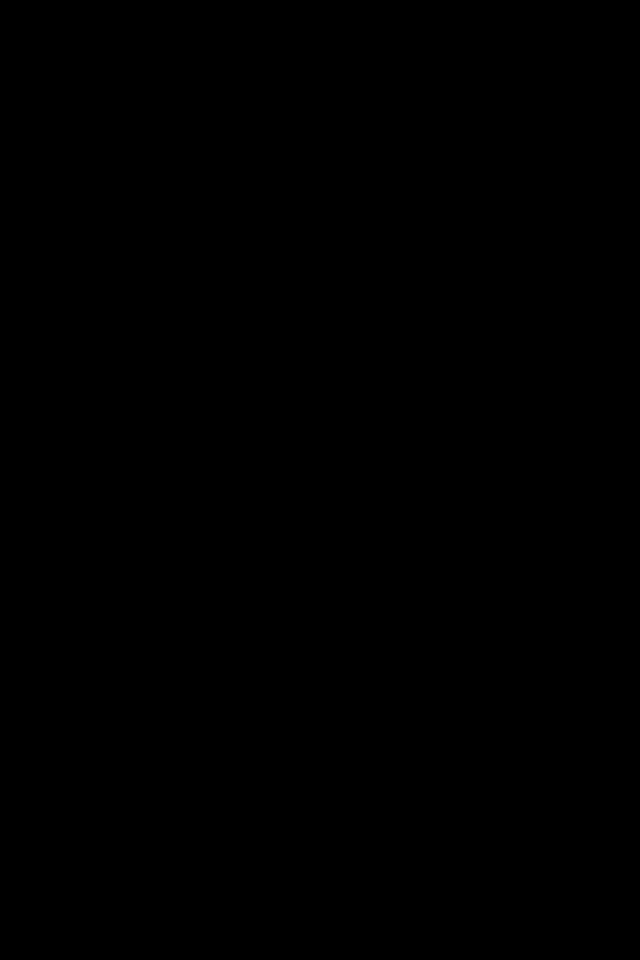

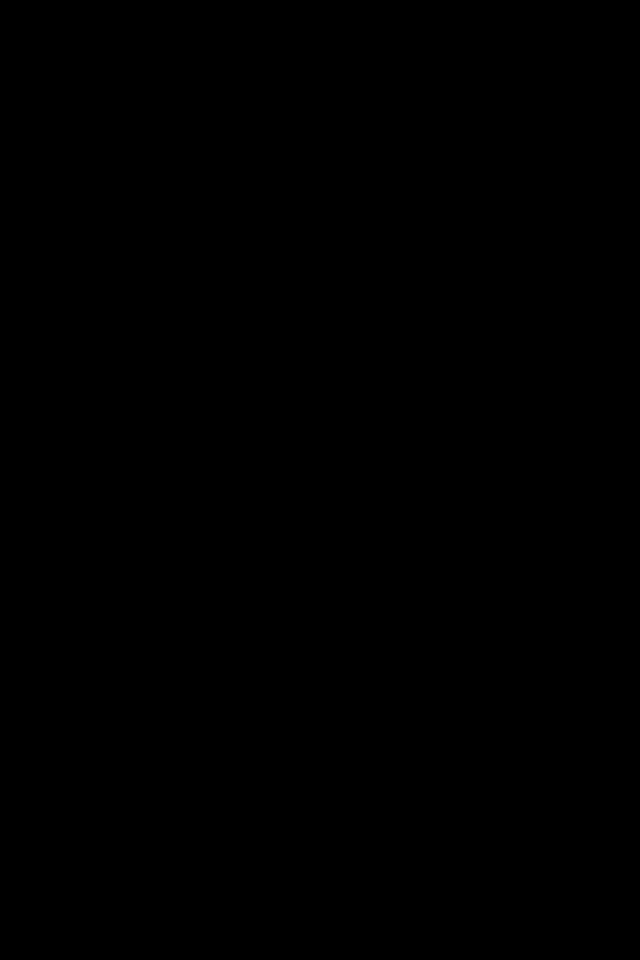

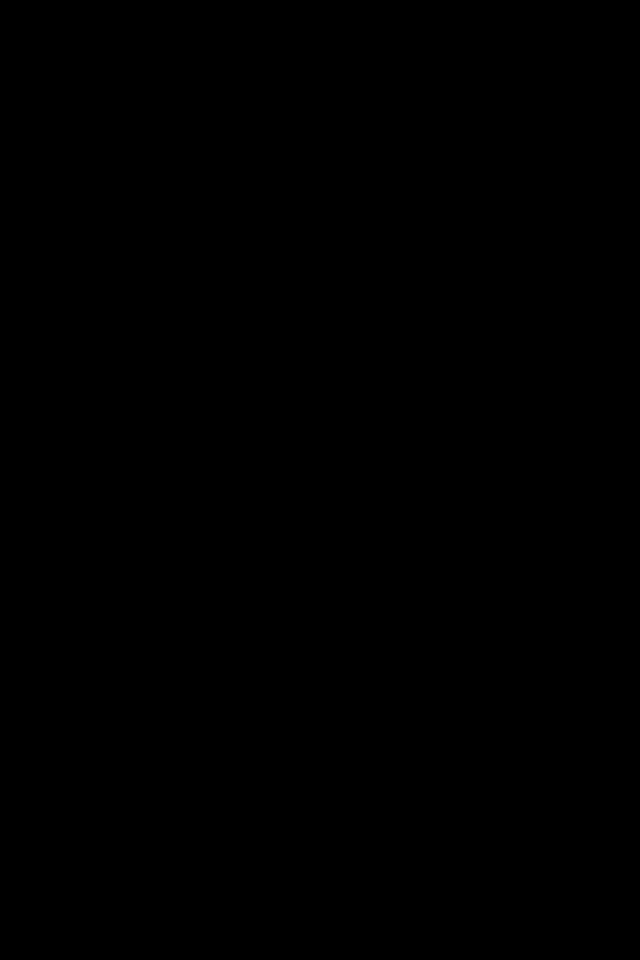

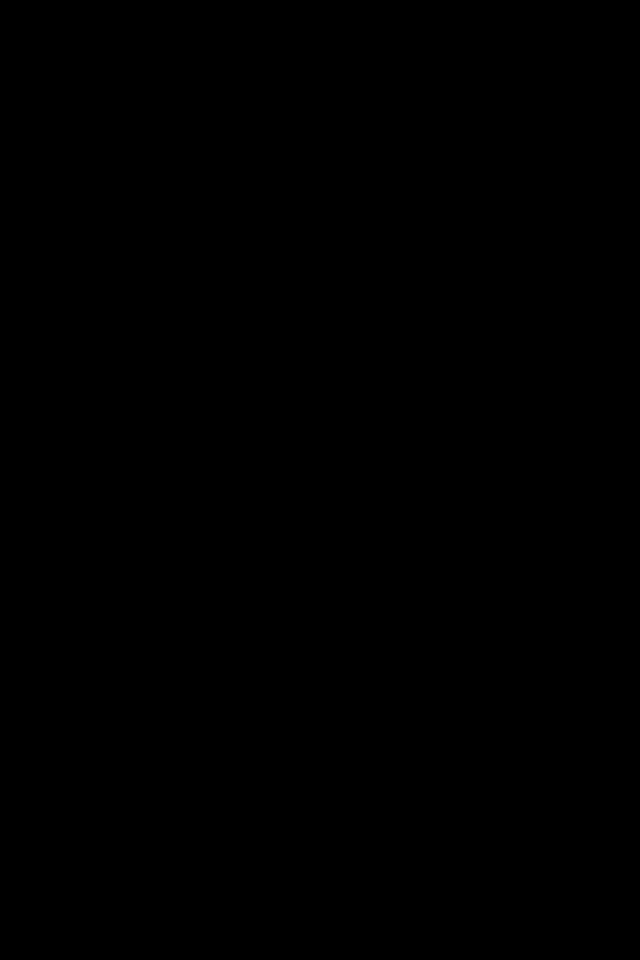

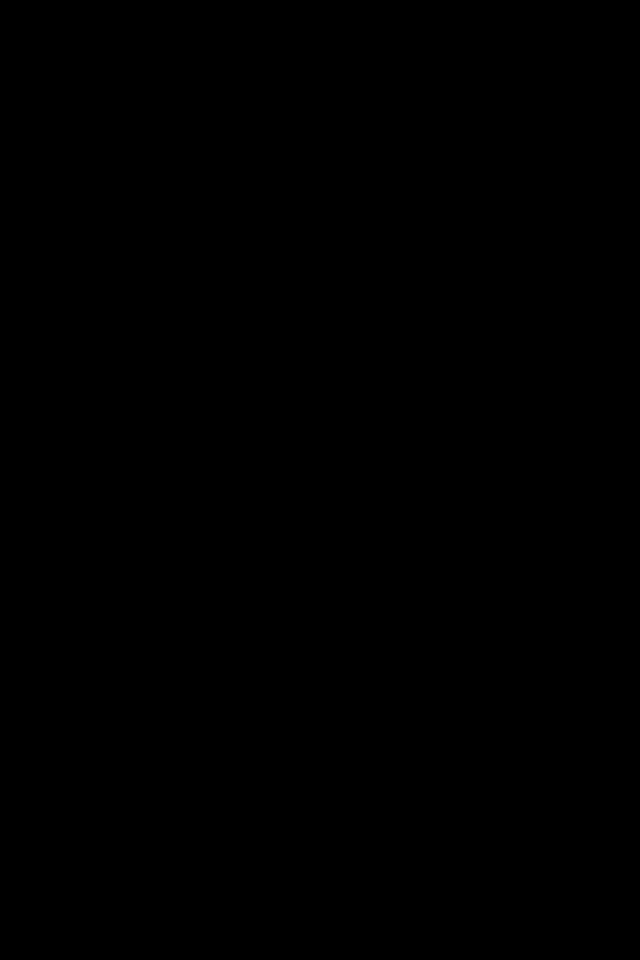

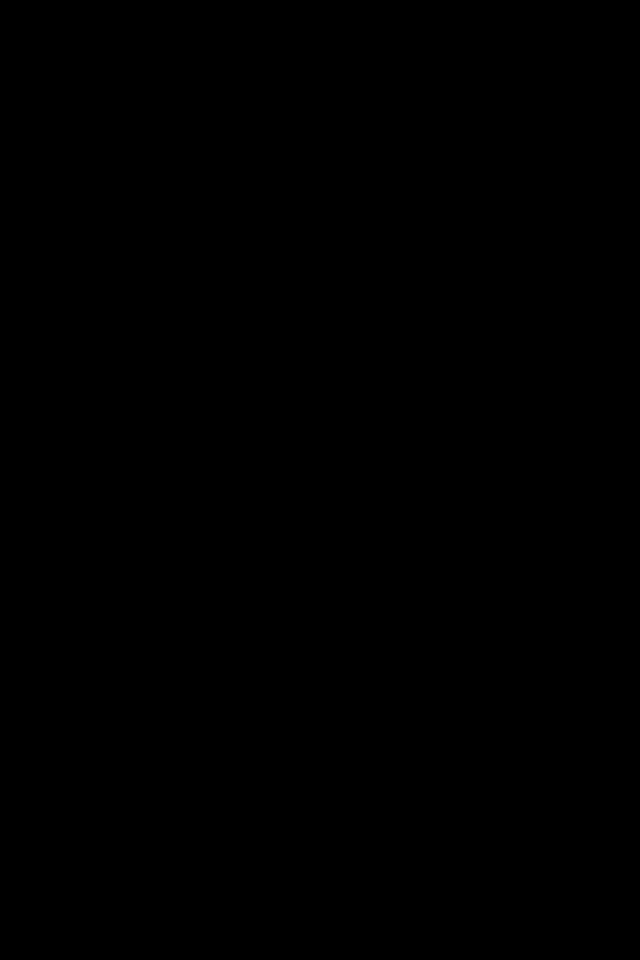

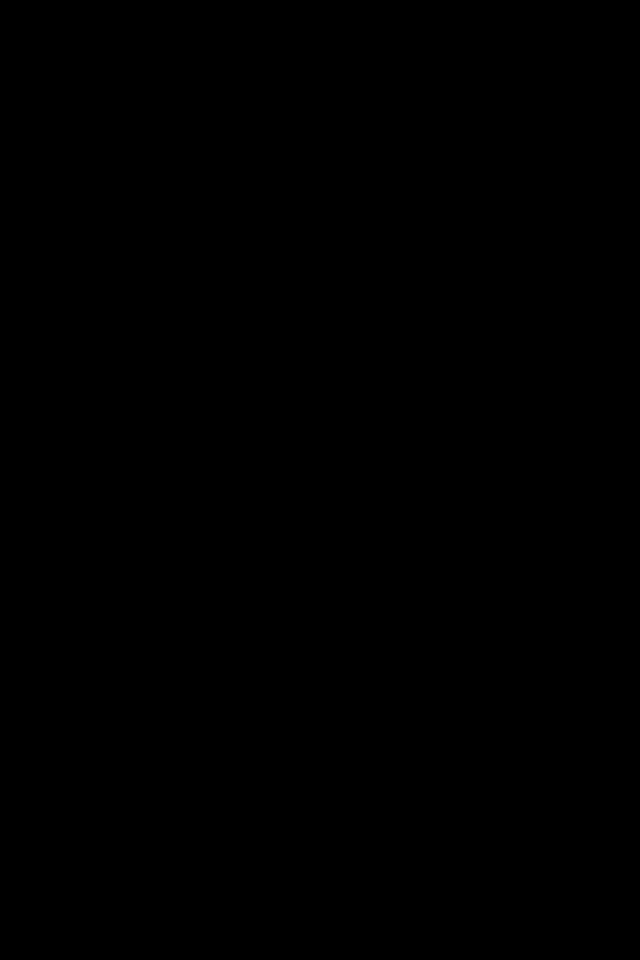

In [ ]:
import re

target = imag_1a
cv2_imshow(target)

for s in vetor:
  a = re.findall(r'\d+',s)
  b = a[:3]
  c = a[3:]

  b = [int(x) for x in b]
  c = [int(x) for x in c]

  image_mask(b, c, target)

#### Imagem 2

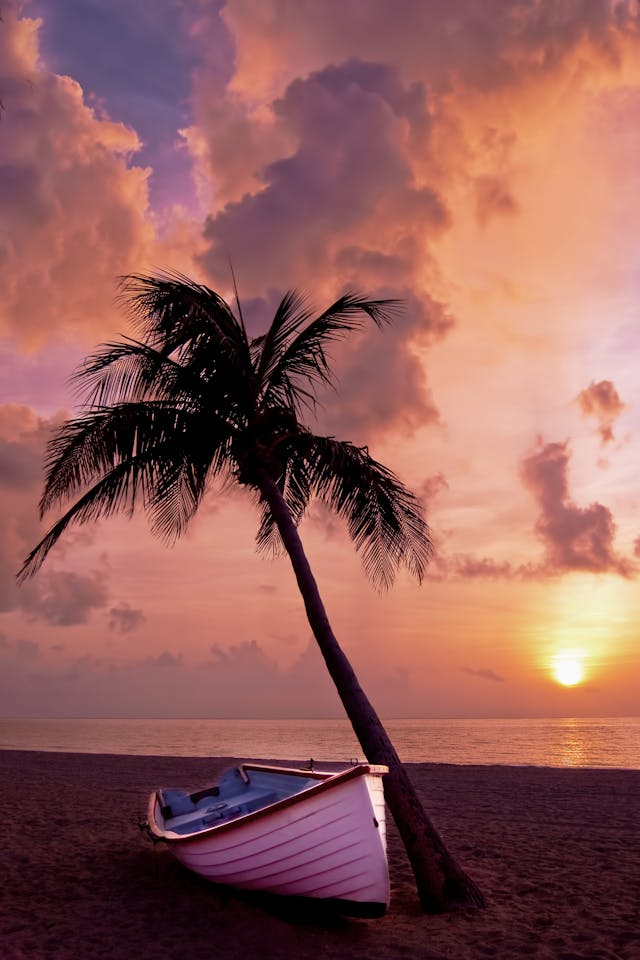

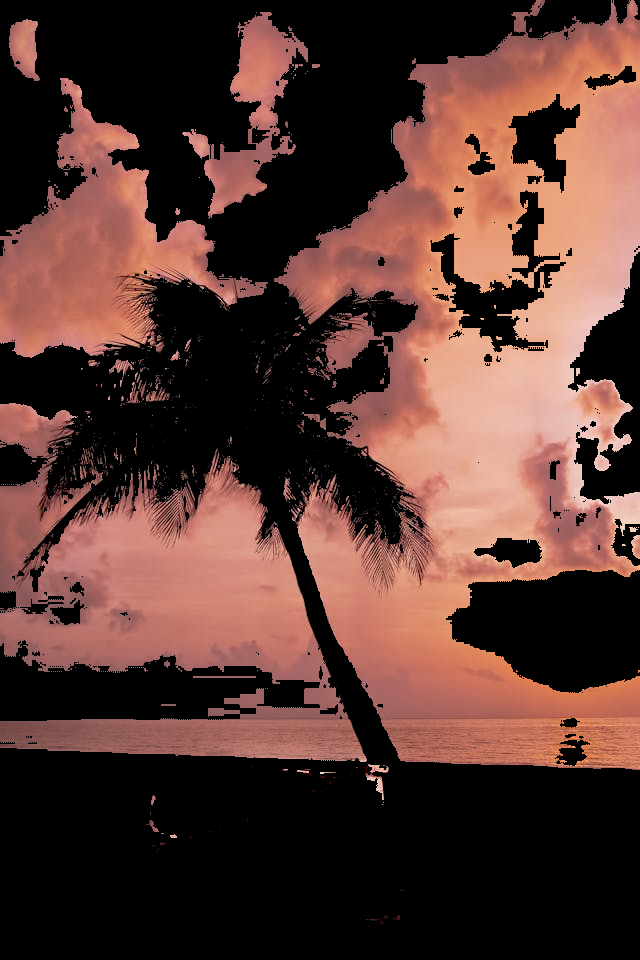

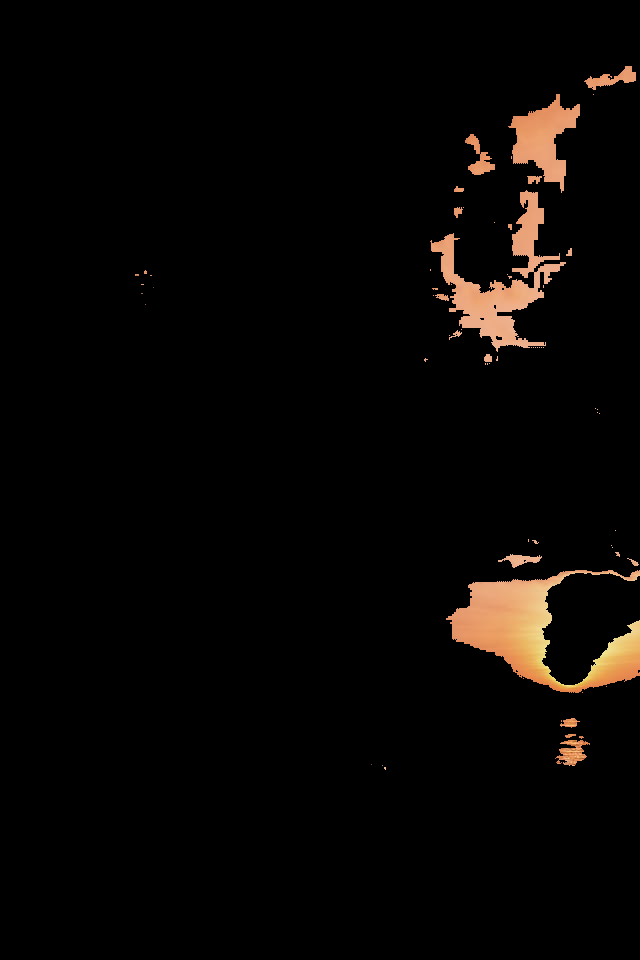

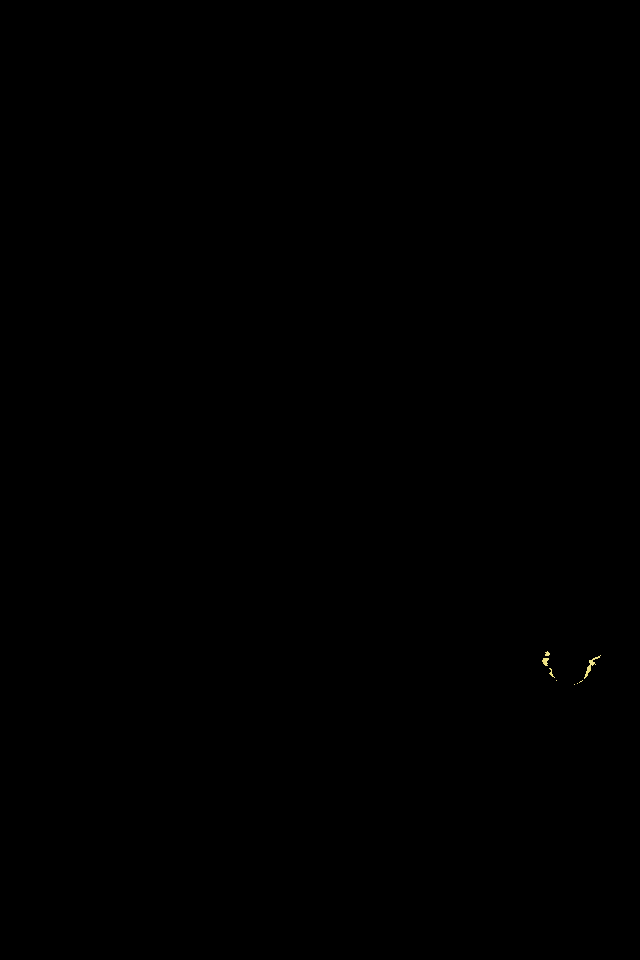

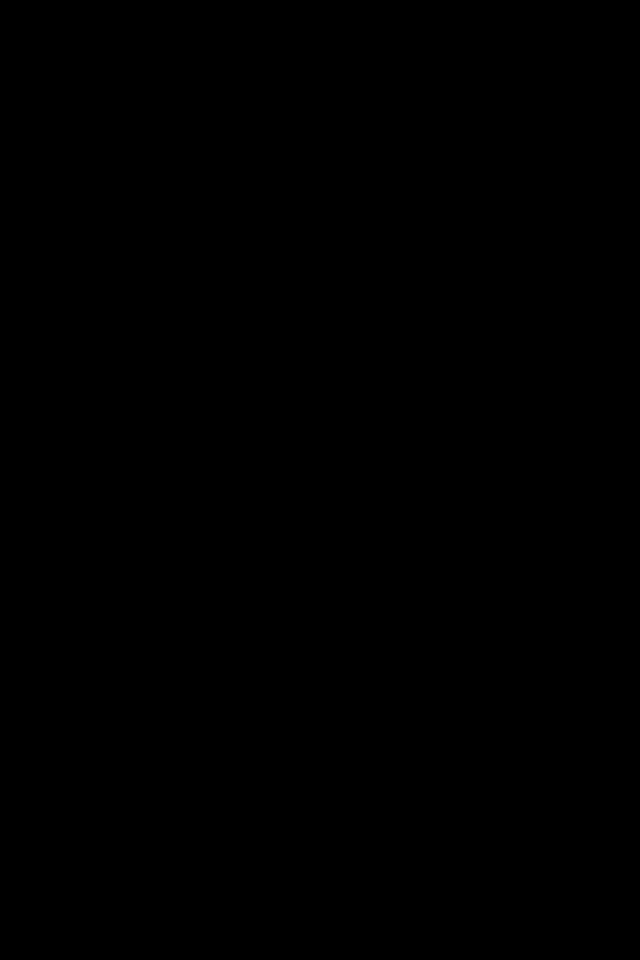

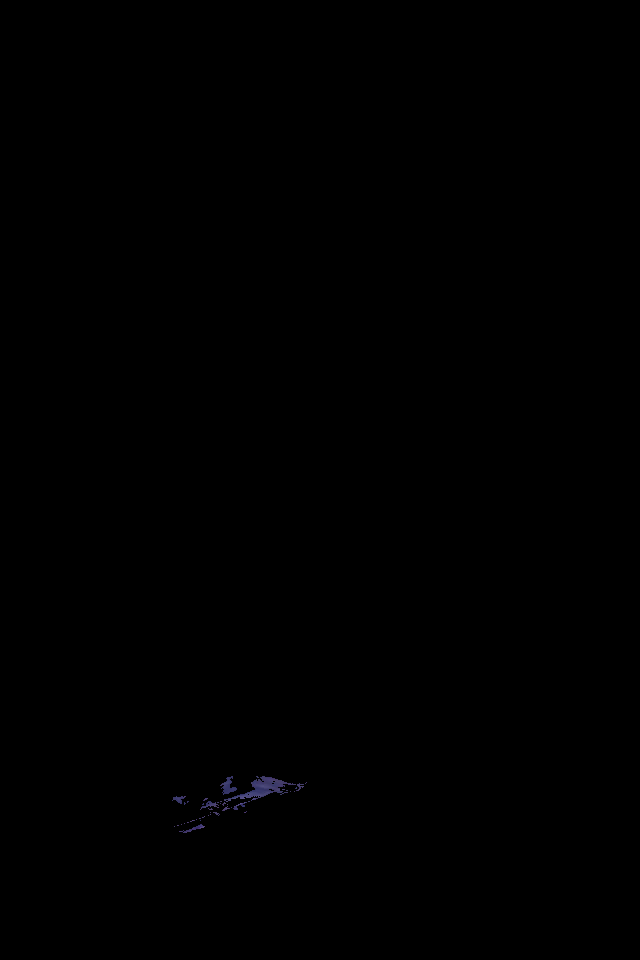

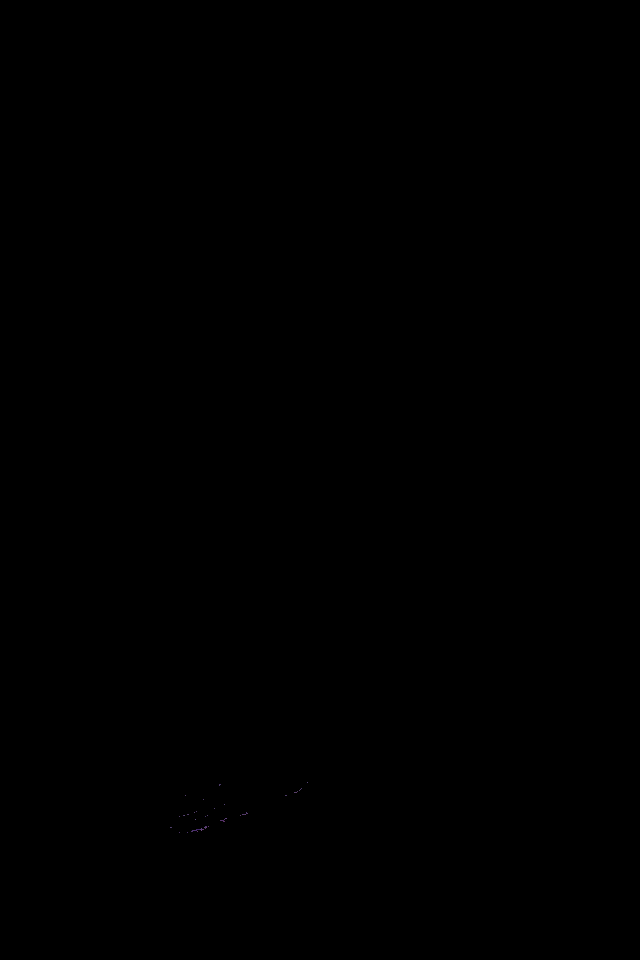

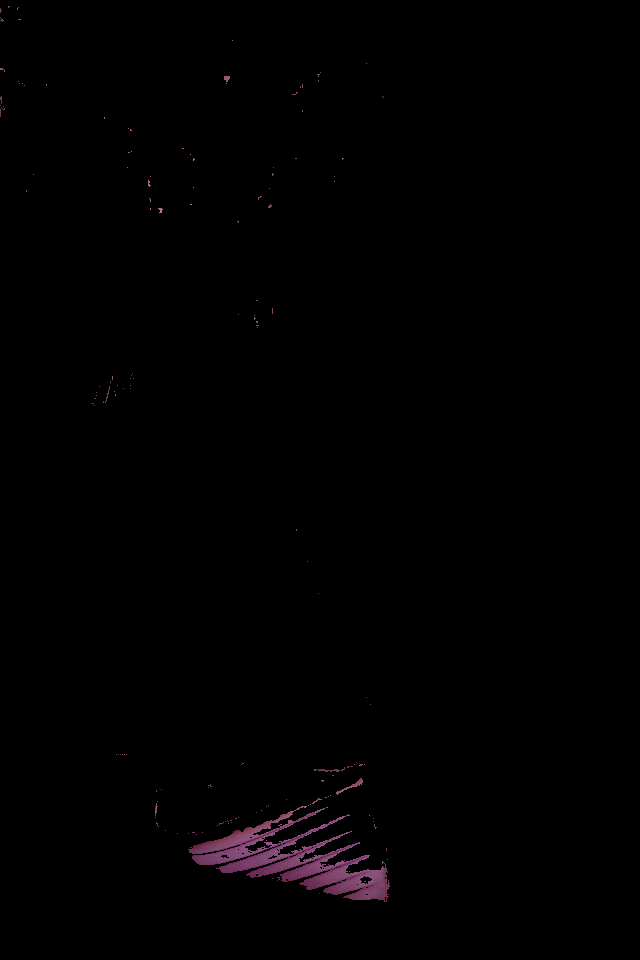

In [ ]:
import re

target = imag_2a
cv2_imshow(target)

for s in vetor:
  a = re.findall(r'\d+',s)
  b = a[:3]
  c = a[3:]

  b = [int(x) for x in b]
  c = [int(x) for x in c]

  image_mask(b, c, target)

#### Imagem 3

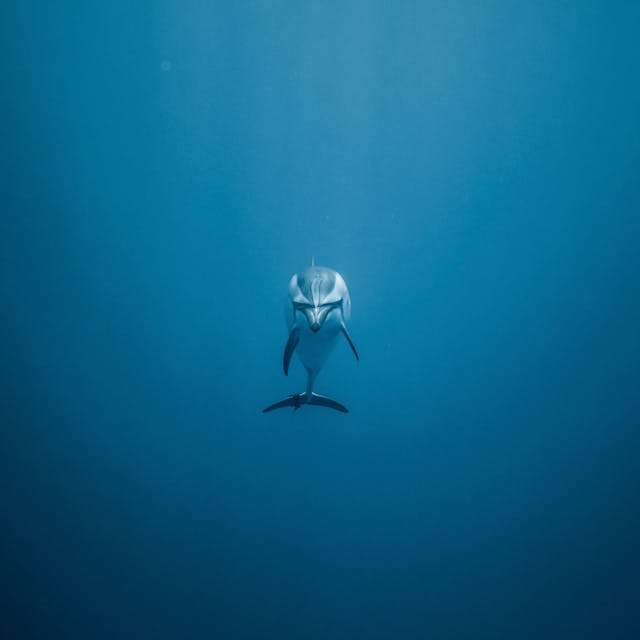

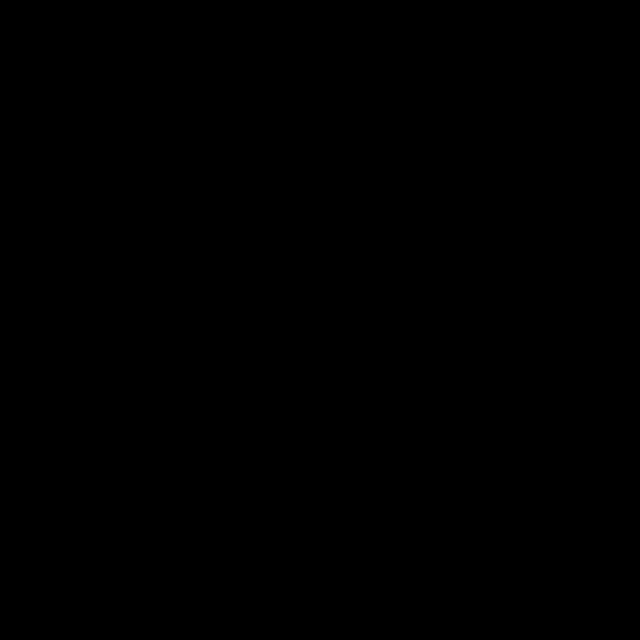

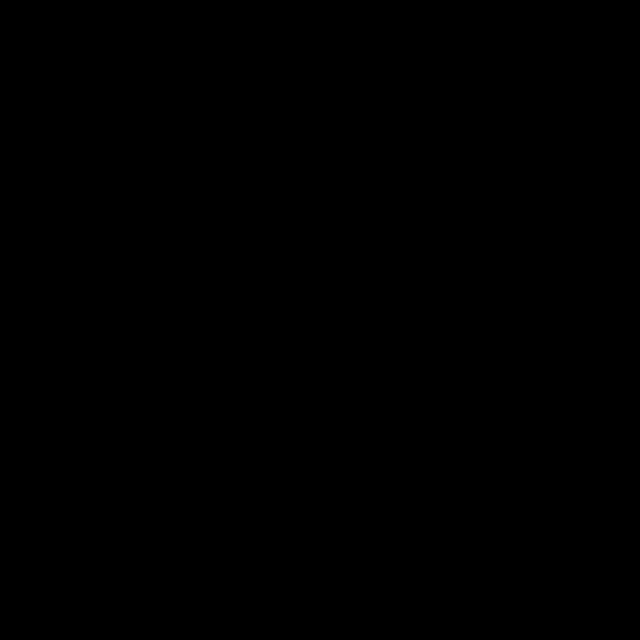

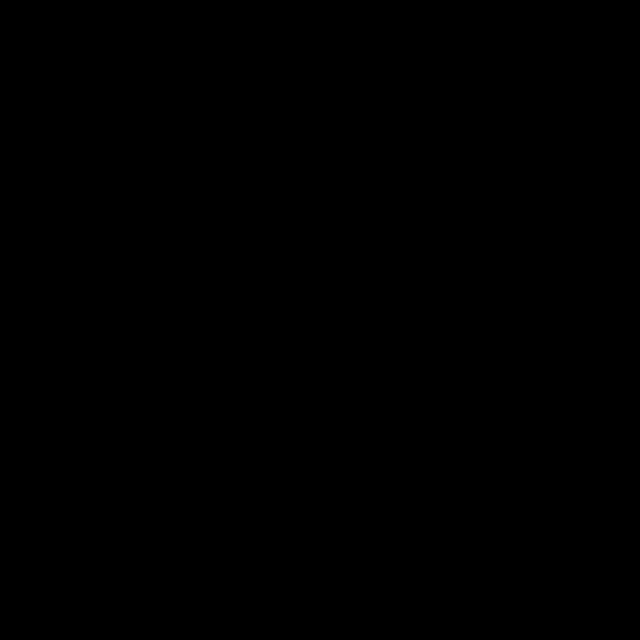

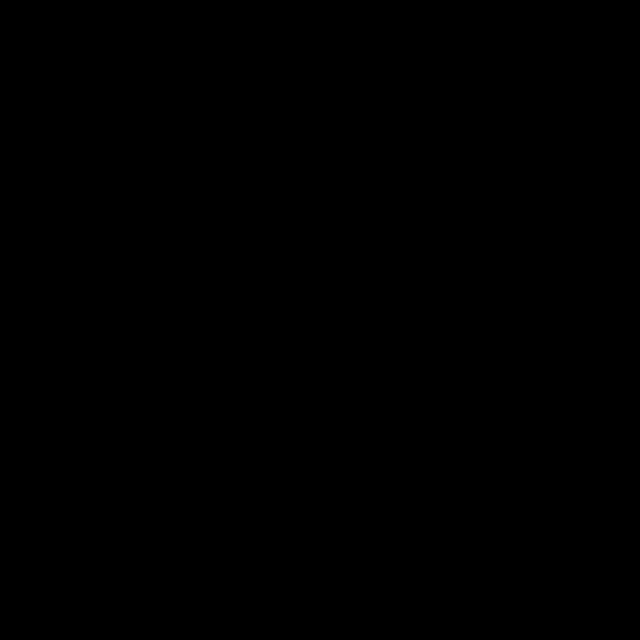

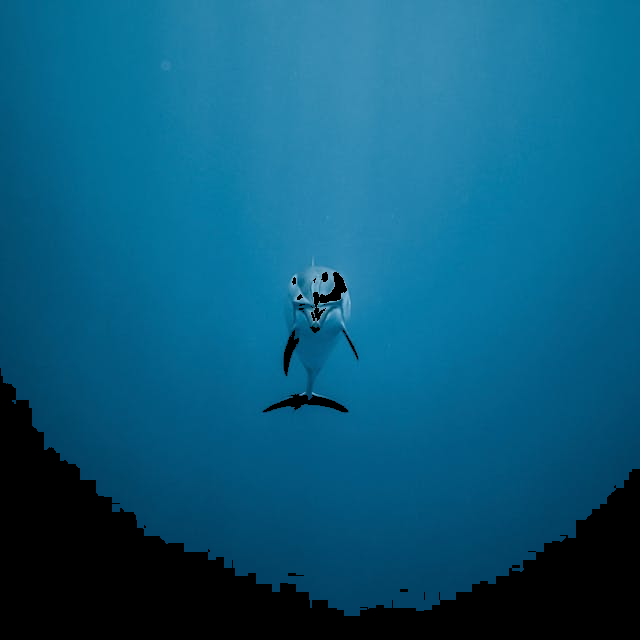

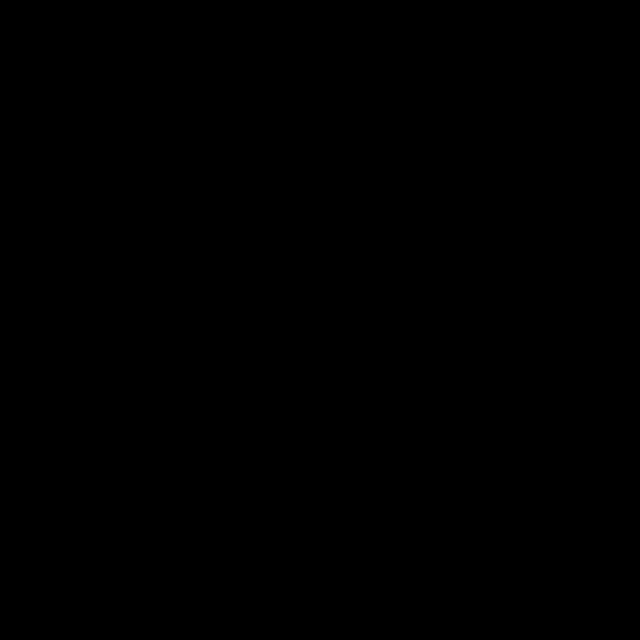

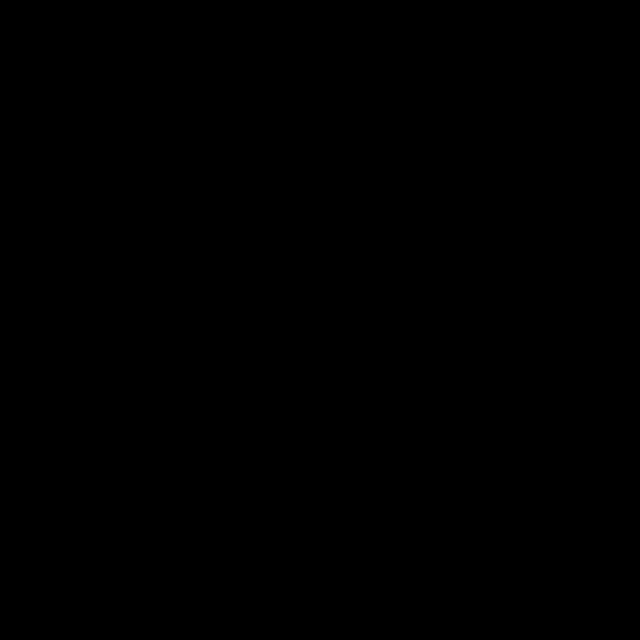

In [ ]:
import re

target = imag_3a
cv2_imshow(target)

for s in vetor:
  a = re.findall(r'\d+',s)
  b = a[:3]
  c = a[3:]

  b = [int(x) for x in b]
  c = [int(x) for x in c]


  image_mask(b, c, target)

#### Imagem 4

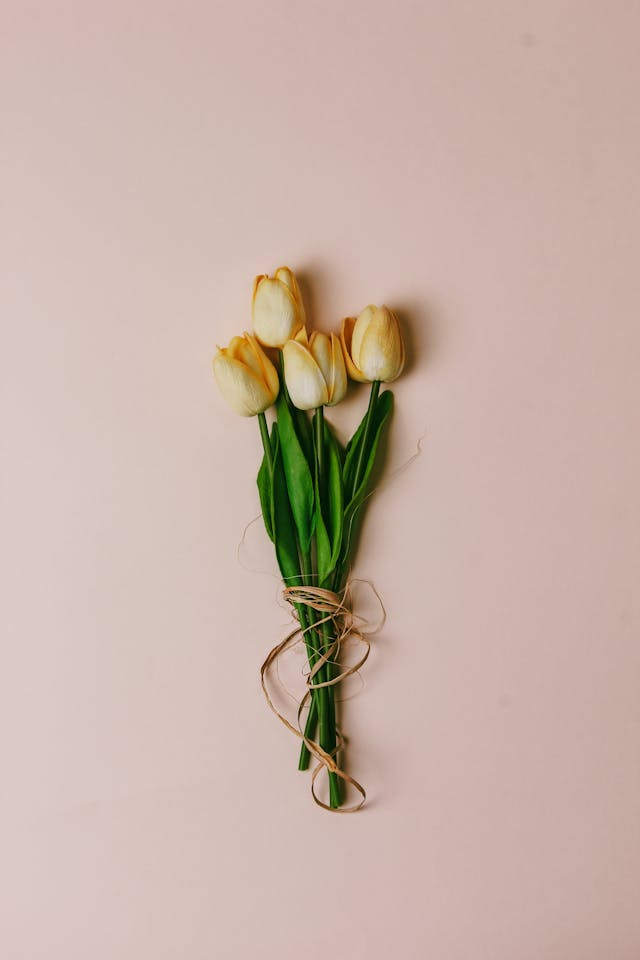

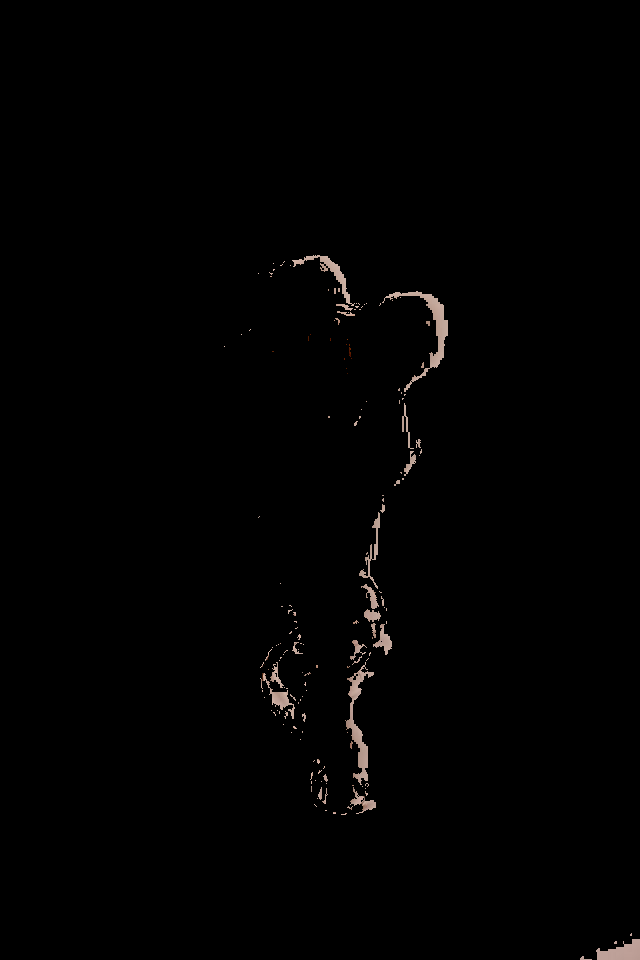

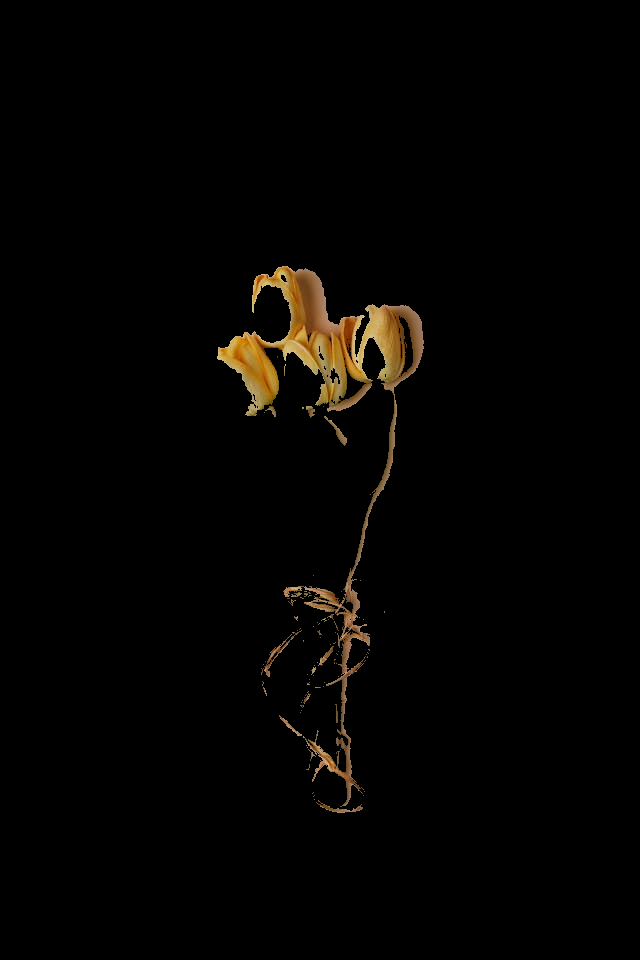

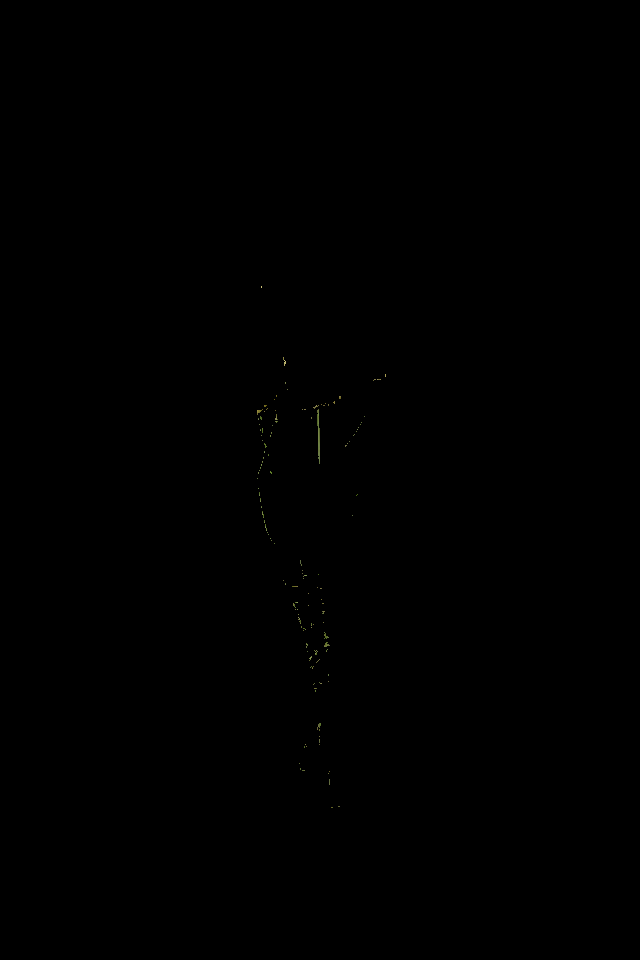

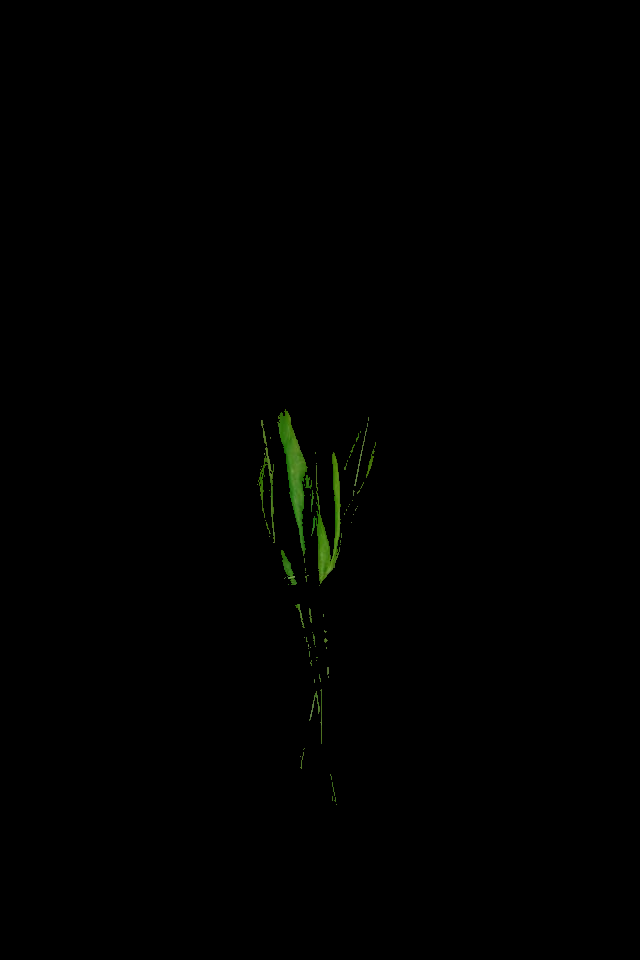

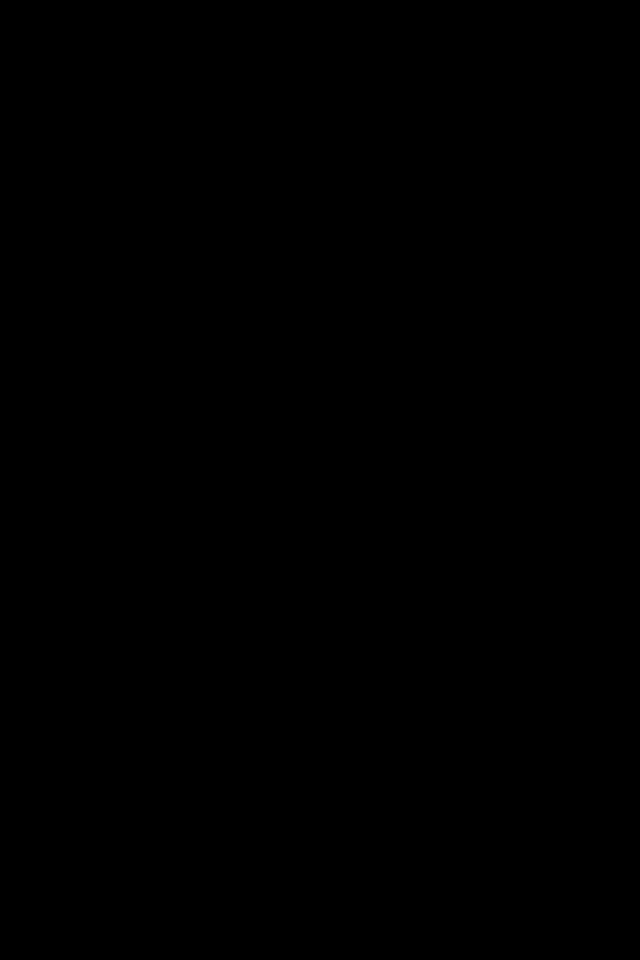

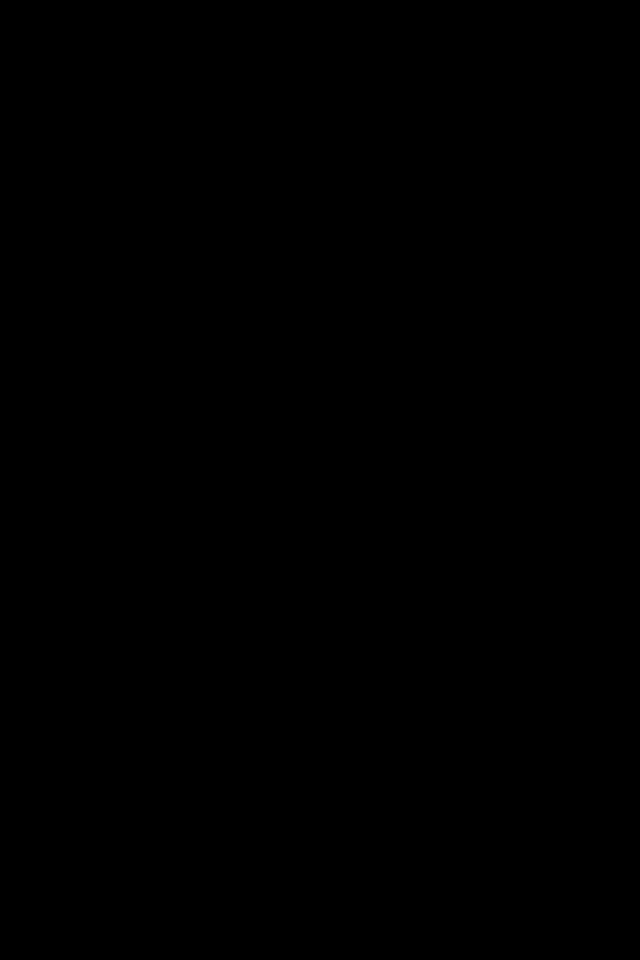

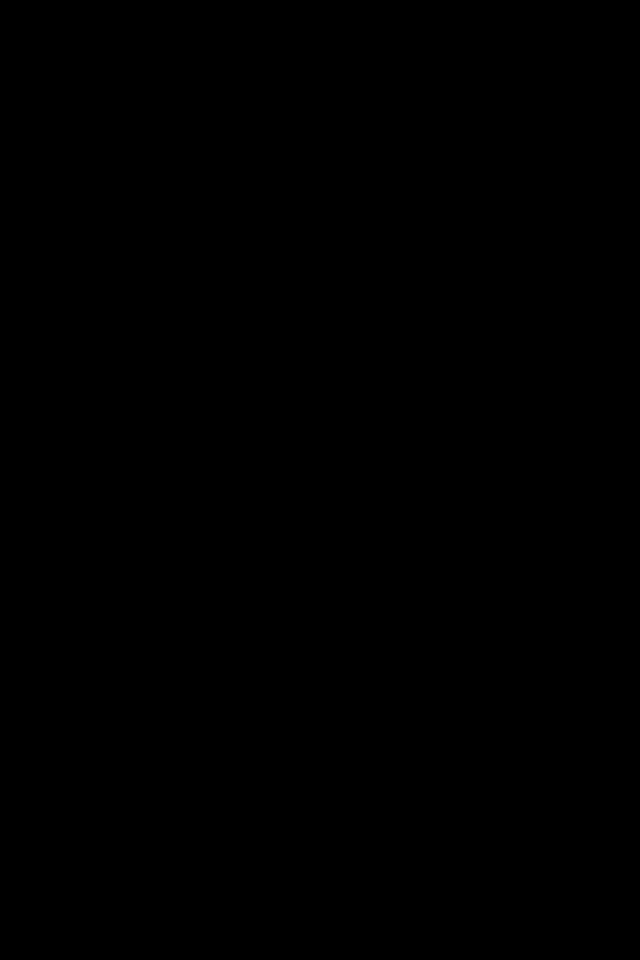

In [ ]:
import re

target = imag_4a
cv2_imshow(target)

for s in vetor:
  a = re.findall(r'\d+',s)
  b = a[:3]
  c = a[3:]

  b = [int(x) for x in b]
  c = [int(x) for x in c]

  image_mask(b, c, target)